Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [1]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [2]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                  NaN             Afghanistan  33.000000   
1                                  NaN                 Albania  41.153300   
2                                  NaN                 Algeria  28.033900   
3                                  NaN                 Andorra  42.506300   
4                                  NaN                  Angola -11.202700   
5                                  NaN     Antigua and Barbuda  17.060800   
6                                  NaN               Argentina -38.416100   
7                                  NaN                 Armenia  40.069100   
8         Australian Capital Territory               Australia -35.473500   
9                      New South Wales               Australia -33.868800   
10                  Northern Territory               Australia -12.463400   
11                          Queensland               Australia -28.016700   
12                     South Australia               Australia -34.928500   
13                            Tasmania               Australia -41.454500   
14                            Victoria               Australia -37.813600   
15                   Western Australia               Australia -31.950500   
16                                 NaN                 Austria  47.516200   
17                                 NaN              Azerbaijan  40.143100   
18                                 NaN                 Bahamas  25.034300   
19                                 NaN                 Bahrain  26.027500   
20                                 NaN              Bangladesh  23.685000   
21                                 NaN                Barbados  13.193900   
22                                 NaN                 Belarus  53.709800   
23                                 NaN                 Belgium  50.833300   
24                                 NaN                   Benin   9.307700   
25                                 NaN                  Bhutan  27.514200   
26                                 NaN                 Bolivia -16.290200   
27                                 NaN  Bosnia and Herzegovina  43.915900   
28                                 NaN                  Brazil -14.235000   
29                                 NaN                  Brunei   4.535300   
..                                 ...                     ...        ...   
233                                NaN                 Grenada  12.116500   
234                                NaN              Mozambique -18.665695   
235                                NaN                   Syria  34.802075   
236                                NaN             Timor-Leste  -8.874217   
237                                NaN                  Belize  13.193900   
238                          Recovered                  Canada   0.000000   
239                                NaN                    Laos  19.856270   
240                                NaN                   Libya  26.335100   
241                                NaN      West Bank and Gaza  31.952200   
242                                NaN           Guinea-Bissau  11.803700   
243                                NaN                    Mali  17.570692   
244                                NaN   Saint Kitts and Nevis  17.357822   
245              Northwest Territories                  Canada  64.825500   
246                              Yukon                  Canada  64.282300   
247                                NaN                  Kosovo  42.602636   
248                                NaN                   Burma  21.916200   
249                           Anguilla          United Kingdom  18.220600   
250             British Virgin Islands          United Kingdom  18.420700   
251           Turks and Caicos Islands          United Kingdom  21.694000   
252                                NaN              MS Zaandam   0.000000   
253                 

## Get Population

In [3]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [4]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                  NaN             Afghanistan  33.000000   
1                                  NaN                 Albania  41.153300   
2                                  NaN                 Algeria  28.033900   
3                                  NaN                 Andorra  42.506300   
4                                  NaN                  Angola -11.202700   
5                                  NaN     Antigua and Barbuda  17.060800   
6                                  NaN               Argentina -38.416100   
7                                  NaN                 Armenia  40.069100   
8         Australian Capital Territory               Australia -35.473500   
9                      New South Wales               Australia -33.868800   
10                  Northern Territory               Australia -12.463400   
11                          Queensland               Australia -28.016700   
12                     South Australia               Australia -34.928500   
13                            Tasmania               Australia -41.454500   
14                            Victoria               Australia -37.813600   
15                   Western Australia               Australia -31.950500   
16                                 NaN                 Austria  47.516200   
17                                 NaN              Azerbaijan  40.143100   
18                                 NaN                 Bahamas  25.034300   
19                                 NaN                 Bahrain  26.027500   
20                                 NaN              Bangladesh  23.685000   
21                                 NaN                Barbados  13.193900   
22                                 NaN                 Belarus  53.709800   
23                                 NaN                 Belgium  50.833300   
24                                 NaN                   Benin   9.307700   
25                                 NaN                  Bhutan  27.514200   
26                                 NaN                 Bolivia -16.290200   
27                                 NaN  Bosnia and Herzegovina  43.915900   
28                                 NaN                  Brazil -14.235000   
29                                 NaN                  Brazil -14.235000   
..                                 ...                     ...        ...   
236                                NaN                 Grenada  12.116500   
237                                NaN              Mozambique -18.665695   
238                                NaN                   Syria  34.802075   
239                                NaN             Timor-Leste  -8.874217   
240                                NaN                  Belize  13.193900   
241                          Recovered                  Canada   0.000000   
242                                NaN                    Laos  19.856270   
243                                NaN                   Libya  26.335100   
244                                NaN      West Bank and Gaza  31.952200   
245                                NaN           Guinea-Bissau  11.803700   
246                                NaN                    Mali  17.570692   
247                                NaN   Saint Kitts and Nevis  17.357822   
248              Northwest Territories                  Canada  64.825500   
249                              Yukon                  Canada  64.282300   
250                                NaN                  Kosovo  42.602636   
251                                NaN                   Burma  21.916200   
252                           Anguilla          United Kingdom  18.220600   
253             British Virgin Islands          United Kingdom  18.420700   
254           Turks and Caicos Islands          United Kingdom  21.694000   
255                                NaN              MS Zaandam   0.000000   
256                 

In [5]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat      Long  \
185            NaN                       Philippines  13.0000  122.0000   
186            NaN                            Poland  51.9194   19.1451   
187            NaN                          Portugal  39.3999   -8.2245   
188            NaN                             Qatar  25.3548   51.1839   
189            NaN                           Romania  45.9432   24.9668   
190            NaN                            Russia  60.0000   90.0000   
191            NaN                            Rwanda  -1.9403   29.8739   
192            NaN                       Saint Lucia  13.9094  -60.9789   
193            NaN  Saint Vincent and the Grenadines  12.9843  -61.2872   
194            NaN                        San Marino  43.9424   12.4578   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/20  \
185        0        0        0        0        0        0  ...       78   
186        0        0        0        0        0        0  ...       31   
187        0        0        0        0        0        0  ...      140   
188        0        0        0        0        0        0  ...        1   
189        0        0        0        0        0        0  ...       65   
190        0        0        0        0        0        0  ...        9   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...        0   
194        0        0        0        0        0        0  ...       25   

     3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20   Population   \
185       88      96     107     136     144     152     163   104,900,000   
186       33      43      57      71      79      94     107    37,980,000   
187      160     187     209     246     266     295     311    10,290,000   
188        2       2       3       3       3       4       4           NaN   
189       82      92     115     133     146     151     176    19,530,000   
190       17      24      30      34      43      45      47   144,500,000   
191        0       0       0       0       0       0       0           NaN   
192        0       0       0       0       0       0       0           NaN   
193        0       0       0       0       0       0       0           NaN   
194       26      26      30      30      32      32      32           NaN   

                                   region  
185                       Philippines_nan  
186                            Poland_nan  
187                          Portugal_nan  
188                             Qatar_nan  
189                           Romania_nan  
190                            Russia_nan  
191                            Rwanda_nan  
192                       Saint Lucia_nan  
193  Saint Vincent and the Grenadines_nan  
194                        San Marino_nan  

[10 rows x 82 columns]

In [6]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN            Norway  60.4720    8.4689        0        0   
176            NaN              Oman  21.0000   57.0000        0        0   
177            NaN          Pakistan  30.3753   69.3451        0        0   
178            NaN            Panama   8.5380  -80.7821        0        0   
179            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
180            NaN          Paraguay -23.4425  -58.4438        0        0   
181            NaN              Peru  -9.1900  -75.0152        0        0   
182            NaN       Philippines  13.0000  122.0000        0        0   
183            NaN            Poland  51.9194   19.1451        0        0   
184            NaN          Portugal  39.3999   -8.2245        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/20  3/31/20  4/1/20  \
175        0        0        0        0  ...       12       13      13   
176        0        0        0        0  ...       29       34      34   
177        0        0        0        0  ...       76       76      94   
178        0        0        0        0  ...        4        9       9   
179        0        0        0        0  ...        0        0       0   
180        0        0        0        0  ...        1        1       1   
181        0        0        0        0  ...       53      394     394   
182        0        0        0        0  ...       42       49      50   
183        0        0        0        0  ...        7        7      47   
184        0        0        0        0  ...       43       43      43   

     4/2/20  4/3/20  4/4/20  4/5/20  4/6/20   Population   \
175      32      32      32      32      32     5,357,000   
176      57      57      61      61      61     4,636,000   
177     125     126     131     211     259   197,000,000   
178       9      10      13      13      13           NaN   
179       0       0       0       0       0           NaN   
180       2       6      12      12      12           NaN   
181     537     537     914     989     997           NaN   
182      51      52      57      64      73   104,900,000   
183      56      56     116     134     162    37,980,000   
184      68      68      75      75     140    10,290,000   

                   region  
175            Norway_nan  
176              Oman_nan  
177          Pakistan_nan  
178            Panama_nan  
179  Papua New Guinea_nan  
180          Paraguay_nan  
181              Peru_nan  
182       Philippines_nan  
183            Poland_nan  
184          Portugal_nan  

[10 rows x 82 columns]

In [7]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat      Long  \
185            NaN                       Philippines  13.0000  122.0000   
186            NaN                            Poland  51.9194   19.1451   
187            NaN                          Portugal  39.3999   -8.2245   
188            NaN                             Qatar  25.3548   51.1839   
189            NaN                           Romania  45.9432   24.9668   
190            NaN                            Russia  60.0000   90.0000   
191            NaN                            Rwanda  -1.9403   29.8739   
192            NaN                       Saint Lucia  13.9094  -60.9789   
193            NaN  Saint Vincent and the Grenadines  12.9843  -61.2872   
194            NaN                        San Marino  43.9424   12.4578   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/20  \
185        0        0        0        0        0        0  ...     1546   
186        0        0        0        0        0        0  ...     2055   
187        0        0        0        0        0        0  ...     6408   
188        0        0        0        0        0        0  ...      693   
189        0        0        0        0        0        0  ...     2109   
190        0        0        0        0        0        0  ...     1836   
191        0        0        0        0        0        0  ...       70   
192        0        0        0        0        0        0  ...        9   
193        0        0        0        0        0        0  ...        1   
194        0        0        0        0        0        0  ...      230   

     3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20   Population   \
185     2084    2311    2633    3018    3094    3246    3660   104,900,000   
186     2311    2554    2946    3383    3627    4102    4413    37,980,000   
187     7443    8251    9034    9886   10524   11278   11730    10,290,000   
188      781     835     949    1075    1325    1604    1832           NaN   
189     2245    2460    2738    3183    3613    3864    4057    19,530,000   
190     2337    2777    3548    4149    4731    5389    6343   144,500,000   
191       75      82      84      89     102     104     105           NaN   
192       13      13      13      13      14      14      14           NaN   
193        1       1       2       3       7       7       7           NaN   
194      236     236     245     245     259     266     266           NaN   

                                   region  
185                       Philippines_nan  
186                            Poland_nan  
187                          Portugal_nan  
188                             Qatar_nan  
189                           Romania_nan  
190                            Russia_nan  
191                            Rwanda_nan  
192                       Saint Lucia_nan  
193  Saint Vincent and the Grenadines_nan  
194                        San Marino_nan  

[10 rows x 82 columns]

In [8]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220          Bermuda  United Kingdom  32.3078 -64.7505        0        0   
221   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
222  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
223        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
224      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
225       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
226              NaN  United Kingdom  55.3781  -3.4360        0        0   
227              NaN         Uruguay -32.5228 -55.7658        0        0   
228              NaN   United States  37.0902 -95.7129        1        1   
229              NaN      Uzbekistan  41.3775  64.5853        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/30/20  3/31/20  4/1/20  \
220        0        0        0        0  ...       27       32      32   
221        0        0        0        0  ...       12       14      22   
222        0        0        0        0  ...      141      141     172   
223        0        0        0        0  ...       69       69      81   
224        0        0        0        0  ...       49       60      68   
225        0        0        0        0  ...        5        5       5   
226        0        0        0        0  ...    22141    25150   29474   
227        0        0        0        0  ...      310      338     338   
228        2        2        5        5  ...   161807   188172  213372   
229        0        0        0        0  ...      149      172     181   

     4/2/20  4/3/20  4/4/20  4/5/20  4/6/20   Population   \
220      35      35      35      37      39           NaN   
221      28      28      35      35      39           NaN   
222     193     232     262     309     323           NaN   
223      88      95      98     103     109           NaN   
224      95     114     126     127     139           NaN   
225       5       6       6       6       6           NaN   
226   33718   38168   41903   47806   51608    66,440,000   
227     350     369     400     400     406           NaN   
228  243453  275586  308850  337072  366614   327,200,000   
229     205     227     266     342     457           NaN   

                             region  
220          United Kingdom_Bermuda  
221   United Kingdom_Cayman Islands  
222  United Kingdom_Channel Islands  
223        United Kingdom_Gibraltar  
224      United Kingdom_Isle of Man  
225       United Kingdom_Montserrat  
226              United Kingdom_nan  
227                     Uruguay_nan  
228               United States_nan  
229                  Uzbekistan_nan  

[10 rows x 82 columns]

## Create Time Series + Plots

In [9]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [10]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

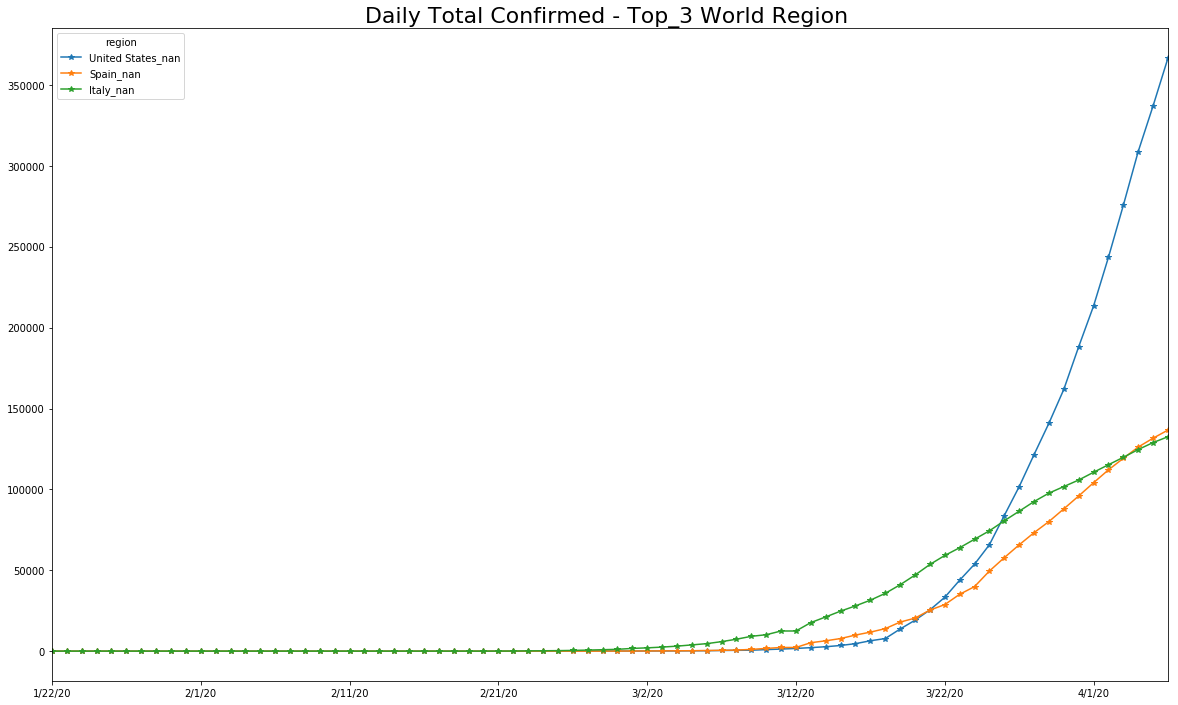

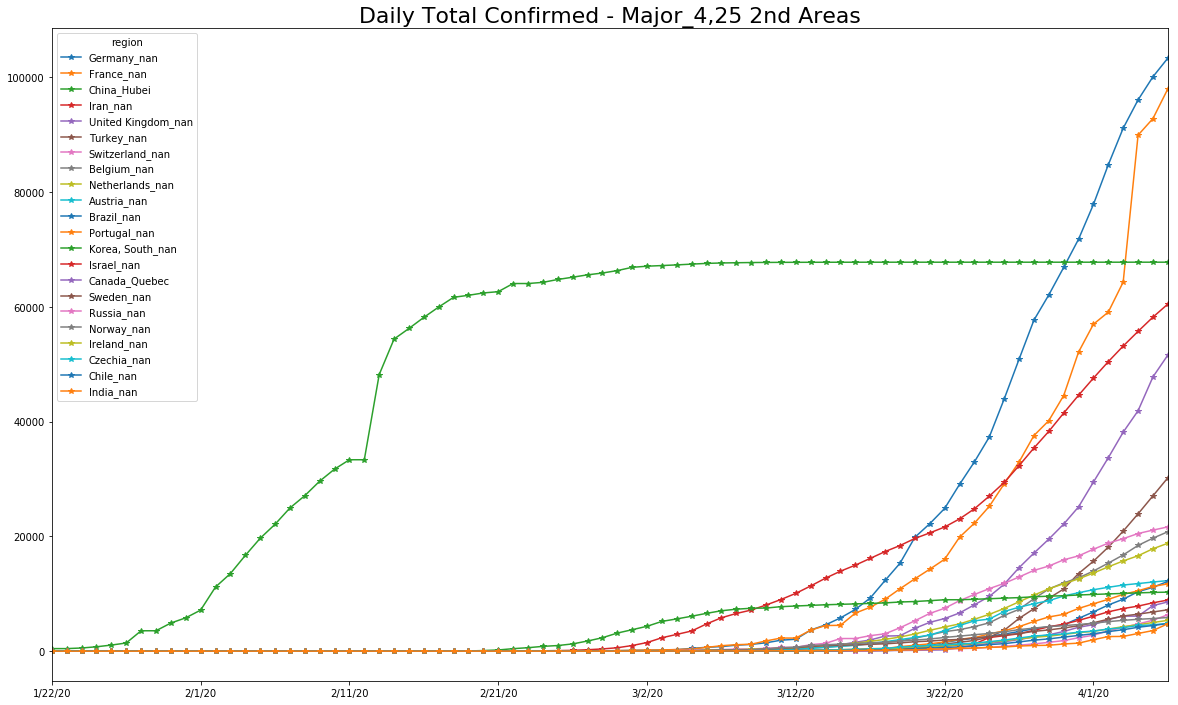

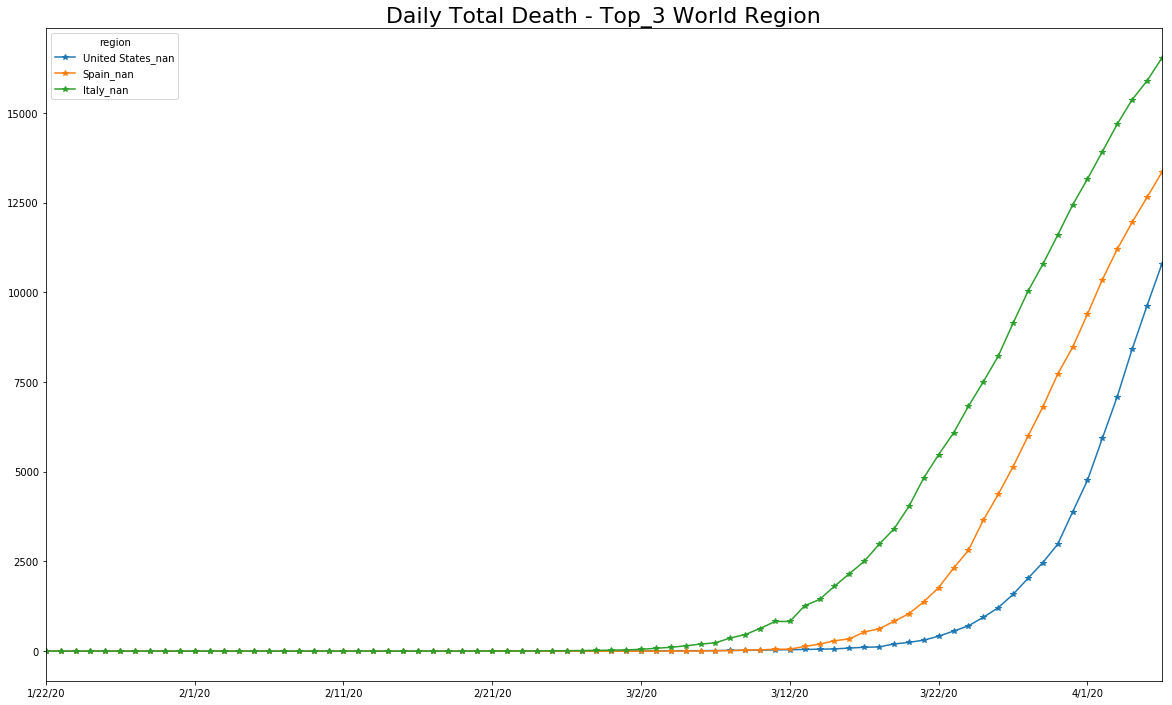

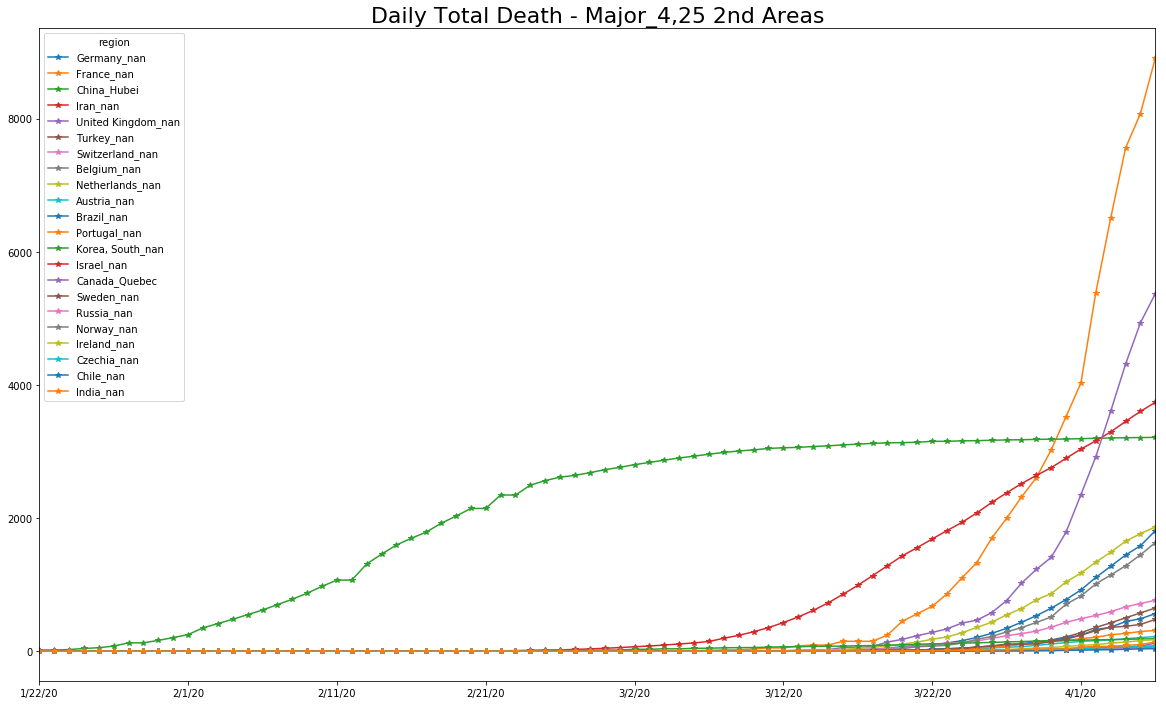

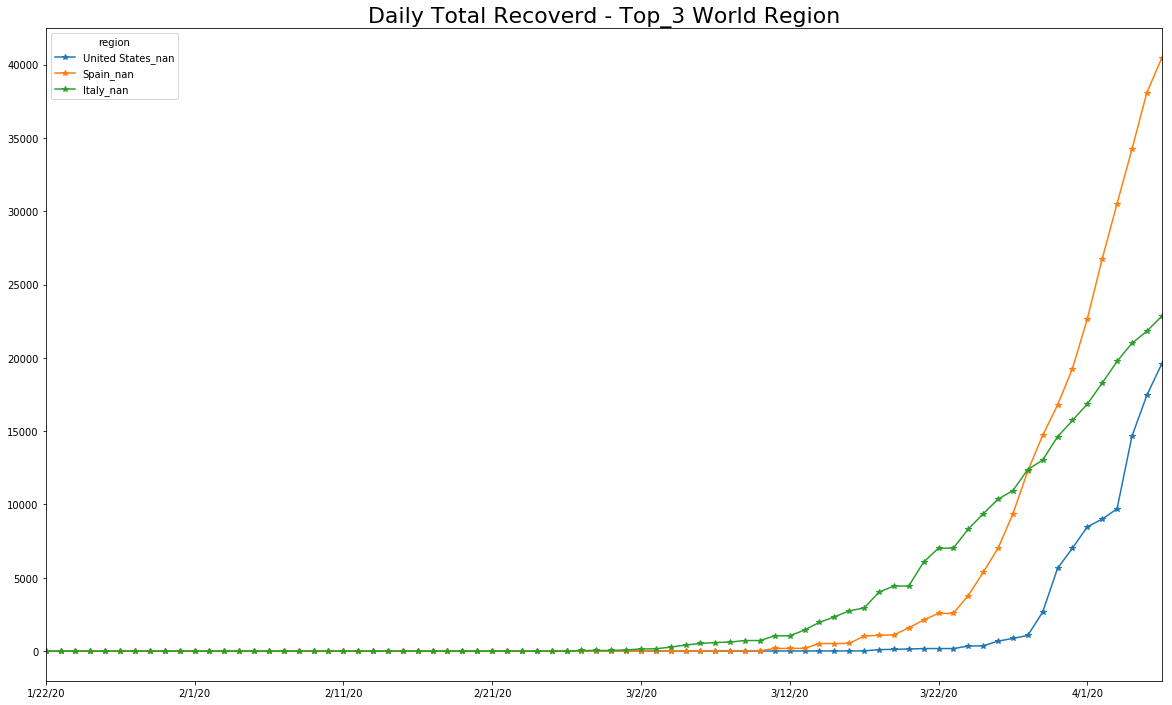

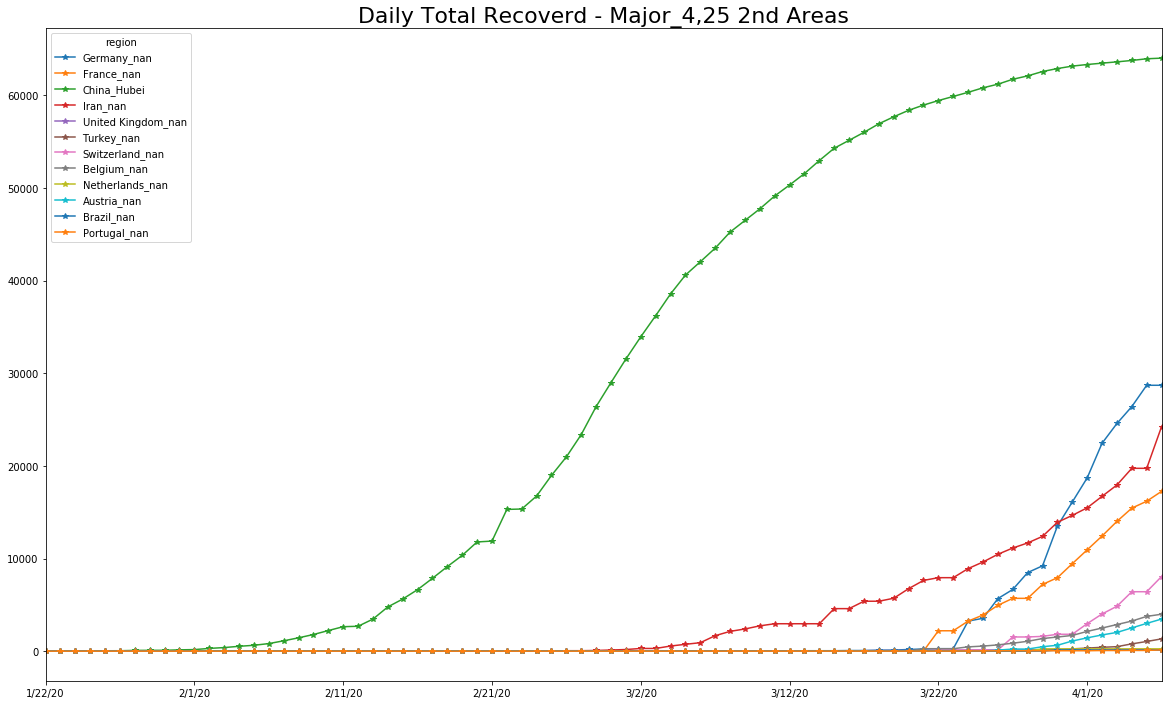

In [12]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [13]:

#!pip install pyweatherbit

In [14]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [15]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [16]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-03-14'
offset_days=0 # is h! #-1 to start yesterday pick today# API free-tier just picks one per api call!
max_days=21

my_weather_fetch_list=['Iran_nan'] #['Brazil_nan'] #= my_train_list

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan


In [17]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [18]:
w[:]

date    region  min   max
0   2020/03/15  Iran_nan    8    18
1   2020/03/15  Iran_nan    8    18
2   2020/03/16  Iran_nan  8.8  14.1
3   2020/03/16  Iran_nan  8.8  14.1
4   2020/03/17  Iran_nan  3.6  16.5
5   2020/03/17  Iran_nan  3.6  16.5
6   2020/03/18  Iran_nan  5.3    19
7   2020/03/18  Iran_nan  5.3    19
8   2020/03/19  Iran_nan  5.1    14
9   2020/03/19  Iran_nan  5.1    14
10  2020/03/20  Iran_nan  6.7  17.3
11  2020/03/20  Iran_nan  6.7  17.3
12  2020/03/21  Iran_nan  3.1    18
13  2020/03/21  Iran_nan  3.1    18
14  2020/03/22  Iran_nan  2.7  16.9
15  2020/03/22  Iran_nan  2.7  16.9
16  2020/03/23  Iran_nan  3.1  10.7
17  2020/03/23  Iran_nan  3.1  10.7
18  2020/03/24  Iran_nan -0.4   7.3
19  2020/03/24  Iran_nan -0.4   7.3
20  2020/03/25  Iran_nan  2.1   9.5
21  2020/03/25  Iran_nan  2.1   9.5
22  2020/03/26  Iran_nan  4.9  12.4
23  2020/03/26  Iran_nan  4.9  12.4
24  2020/03/27  Iran_nan  2.1  12.3
25  2020/03/27  Iran_nan  2.1  12.3
26  2020/03/28  Iran_nan    4  14.4
27  2020/03/28  Iran_nan    4  14.4
28  2020/03/29  Iran_nan  7.1  12.9
29  2020/03/29  Iran_nan  7.1  12.9
30  2020/03/30  Iran_nan  3.8   9.7
31  2020/03/30  Iran_nan  3.8   9.7
32  2020/03/31  Iran_nan  4.8  14.6
33  2020/03/31  Iran_nan  4.8  14.6
34  2020/04/01  Iran_nan  5.4    15
35  2020/04/01  Iran_nan  5.4    15
36  2020/04/02  Iran_nan  3.3    19
37  2020/04/02  Iran_nan  3.3    19
38  2020/04/03  Iran_nan  8.9  18.1
39  2020/04/03  Iran_nan  8.9  18.1
40  2020/04/04  Iran_nan  8.5  19.3
41  2020/04/04  Iran_nan  8.5  19.3

In [19]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [20]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[29:]
ts_d=ts_d[29:]
ts_rec=ts_rec[29:]

In [21]:
ts[:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   
2/23/20                0            0            0            0           0   
2/24/20                1            0            0            0           0   
2/25/20                1            0            1            0           0   
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   
2/29/20                1            0            1            0           0   
3/1/20                 1            0            1            0           0   
3/2/20                 1            0            3            1           0   
3/3/20                 1            0            5            1           0   
3/4/20                 1            0           12            1           0   
3/5/20                 1            0           12            1           0   
3/6/20                 1            0           17            1           0   
3/7/20                 1            0           17            1           0   
3/8/20                 4            0           19            1           0   
3/9/20                 4            2           20            1           0   
3/10/20                5           10           20            1           0   
3/11/20                7           12           20            1           0   
3/12/20                7           23           24            1           0   
3/13/20                7           33           26            1           0   
3/14/20               11           38           37            1           0   
3/15/20               16           42           48            1           0   
3/16/20               21           51           54            2           0   
3/17/20               22           55           60           39           0   
3/18/20               22           59           74           39           0   
3/19/20               22           64           87           53           0   
3/20/20               24           70           90           75           1   
3/21/20               24           76          139           88           2   
3/22/20               40           89          201          113           2   
3/23/20               40          104          230          133           3   
3/24/20               74          123          264          164           3   
3/25/20               84          146          302          188           3   
3/26/20               94          174          367          224           4   
3/27/20              110          186          409          267           4   
3/28/20              110          197          454          308           5   
3/29/20              120          212          511          334           7   
3/30/20              170          223          584          370           7   
3/31/20              174          243          716          376           7   
4/1/20               237          259          847          390           8   
4/2/20               273          277          986          428           8   
4/3/20               281          304         1171          439           8   
4/4/20               299          333         1251          466          10   
4/5/20               349          361         1320          501          14   
4/6/20               367          377         1423          525          16   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/20/20                        0              0            0   
2/21/20                        0              0            0   
2/22/20        

In [22]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [23]:
#!pip install rpy2


In [24]:
import rpy2
%load_ext rpy2.ipython

In [25]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [26]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [27]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [28]:
p=%R pred_all

In [29]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

In [30]:
temp[:]

date           region  confirmed     Y          X      X2
0     2020-02-20  Afghanistan_nan          0   0.0   0.000000  0.0000
1     2020-02-21  Afghanistan_nan          0   0.0   0.000000  0.0000
2     2020-02-22  Afghanistan_nan          0   0.0   0.000000  0.0000
3     2020-02-23  Afghanistan_nan          0   0.0   0.000000  0.0000
4     2020-02-24  Afghanistan_nan          1   1.0   0.000000  0.0000
5     2020-02-25  Afghanistan_nan          1   1.0   0.829164  0.4896
6     2020-02-26  Afghanistan_nan          1   1.0   1.173575  0.5572
7     2020-02-27  Afghanistan_nan          1   1.0   1.308386  0.4961
8     2020-02-28  Afghanistan_nan          1   1.0   1.335020  0.3932
9     2020-02-29  Afghanistan_nan          1   1.0   1.302954  0.2833
10    2020-03-01  Afghanistan_nan          1   1.0   1.242967  0.1841
11    2020-03-02  Afghanistan_nan          1   1.0   1.175804  0.1045
12    2020-03-03  Afghanistan_nan          1   1.0   1.114305  0.0468
13    2020-03-04  Afghanistan_nan          1   1.0   1.064808  0.0093
14    2020-03-05  Afghanistan_nan          1   1.0   1.028990 -0.0120
15    2020-03-06  Afghanistan_nan          1   1.0   1.005717 -0.0215
16    2020-03-07  Afghanistan_nan          1   1.0   0.992530 -0.0233
17    2020-03-08  Afghanistan_nan          4   4.0   0.986636 -0.0209
18    2020-03-09  Afghanistan_nan          4   4.0   2.836291  0.9669
19    2020-03-10  Afghanistan_nan          5   5.0   3.989300  1.3483
20    2020-03-11  Afghanistan_nan          7   7.0   5.219561  1.6796
21    2020-03-12  Afghanistan_nan          7   7.0   7.073759  2.2633
22    2020-03-13  Afghanistan_nan          7   7.0   8.046721  2.2391
23    2020-03-14  Afghanistan_nan         11  11.0   8.408578  1.8960
24    2020-03-15  Afghanistan_nan         16  16.0  10.860422  2.7454
25    2020-03-16  Afghanistan_nan         21  21.0  15.266484  4.4301
26    2020-03-17  Afghanistan_nan         22  22.0  20.797066  6.3095
27    2020-03-18  Afghanistan_nan         22  22.0  24.378445  6.7038
28    2020-03-19  Afghanistan_nan         22  22.0  25.927900  5.9242
29    2020-03-20  Afghanistan_nan         24  24.0  26.170656  4.6367
...          ...              ...        ...   ...        ...     ...
12594 2020-03-09     Zimbabwe_nan          0   0.0   0.000000  0.0000
12595 2020-03-10     Zimbabwe_nan          0   0.0   0.000000  0.0000
12596 2020-03-11     Zimbabwe_nan          0   0.0   0.000000  0.0000
12597 2020-03-12     Zimbabwe_nan          0   0.0   0.000000  0.0000
12598 2020-03-13     Zimbabwe_nan          0   0.0   0.000000  0.0000
12599 2020-03-14     Zimbabwe_nan          0   0.0   0.000000  0.0000
12600 2020-03-15     Zimbabwe_nan          0   0.0   0.000000  0.0000
12601 2020-03-16     Zimbabwe_nan          0   0.0   0.000000  0.0000
12602 2020-03-17     Zimbabwe_nan          0   0.0   0.000000  0.0000
12603 2020-03-18     Zimbabwe_nan          0   0.0   0.000000  0.0000
12604 2020-03-19     Zimbabwe_nan          0   0.0   0.000000  0.0000
12605 2020-03-20     Zimbabwe_nan          1   1.0   0.000000  0.0000
12606 2020-03-21     Zimbabwe_nan          3   3.0   0.616903  0.3278
12607 2020-03-22     Zimbabwe_nan          3   3.0   2.234549  1.1089
12608 2020-03-23     Zimbabwe_nan          3   3.0   3.205785  1.3599
12609 2020-03-24     Zimbabwe_nan          3   3.0   3.690772  1.2924
12610 2020-03-25     Zimbabwe_nan          3   3.0   3.846214  1.0660
12611 2020-03-26     Zimbabwe_nan          3   3.0   3.803870  0.7886
12612 2020-03-27     Zimbabwe_nan          5   5.0   3.662827  0.5251
12613 2020-03-28     Zimbabwe_nan          7   7.0   4.724024  0.9634
12614 2020-03-29     Zimbabwe_nan          7   7.0   6.561613  1.7094
12615 2020-03-30     Zimbabwe_nan          7   7.0   7.601308  1.8531
12616 2020-03-31     Zimbabwe_nan          8   8.0   8.064276  1.6560
12617 2020-04-01     Zimbabwe_nan          8   8.0   8.769844  1.6350
12618 2020-04-02     Zimbabwe_nan          9   9.0   9.030664  1.3826
12619 2020-04-03     Z

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [31]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [32]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [33]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [34]:
w_in_model.tail(10)

date       region   min   max
5713 2020-03-13  Vietnam_nan  22.9  28.4
5714 2020-03-14  Vietnam_nan  24.6  31.0
5715 2020-04-01  Vietnam_nan  25.7  33.0
5716 2020-04-02  Vietnam_nan  25.3  30.0
5717 2020-04-03  Vietnam_nan  25.0  33.0
5718 2020-04-04  Vietnam_nan  26.0  32.0
5719 2020-04-05  Vietnam_nan  24.7  32.0
5720 2020-04-06  Vietnam_nan  25.0  32.0
5721 2020-04-07  Vietnam_nan  24.0  30.0
5722 2020-04-08  Vietnam_nan  23.6  27.0

### Build Train Set Data Structure

In [35]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [36]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [37]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
5     2020-02-25  Afghanistan_nan          1             1             1   
6     2020-02-26  Afghanistan_nan          1             0             1   
7     2020-02-27  Afghanistan_nan          1             0             1   
8     2020-02-28  Afghanistan_nan          1             0             0   
9     2020-02-29  Afghanistan_nan          1             0             0   
10    2020-03-01  Afghanistan_nan          1             0             0   
11    2020-03-02  Afghanistan_nan          1             0             0   
12    2020-03-03  Afghanistan_nan          1             0             0   
13    2020-03-04  Afghanistan_nan          1             0             0   
14    2020-03-05  Afghanistan_nan          1             0             0   
15    2020-03-06  Afghanistan_nan          1             0             0   
16    2020-03-07  Afghanistan_nan          1             0             0   
17    2020-03-08  Afghanistan_nan          4             0             0   
18    2020-03-09  Afghanistan_nan          4             3             3   
19    2020-03-10  Afghanistan_nan          5             0             3   
20    2020-03-11  Afghanistan_nan          7             1             4   
21    2020-03-12  Afghanistan_nan          7             2             3   
22    2020-03-13  Afghanistan_nan          7             0             3   
23    2020-03-14  Afghanistan_nan         11             0             2   
24    2020-03-15  Afghanistan_nan         16             4             4   
25    2020-03-16  Afghanistan_nan         21             5             9   
26    2020-03-17  Afghanistan_nan         22             5            14   
27    2020-03-18  Afghanistan_nan         22             1            11   
28    2020-03-19  Afghanistan_nan         22             0             6   
29    2020-03-20  Afghanistan_nan         24             0             1   
30    2020-03-21  Afghanistan_nan         24             2             2   
31    2020-03-22  Afghanistan_nan         40             0             2   
32    2020-03-23  Afghanistan_nan         40            16            18   
33    2020-03-24  Afghanistan_nan         74             0            16   
34    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
12708 2020-03-27       Zambia_nan         22             4            13   
12709 2020-03-28       Zambia_nan         28             6            19   
12710 2020-03-29       Zambia_nan         29             6            16   
12711 2020-03-30       Zambia_nan         35             1            13   
12712 2020-03-31       Zambia_nan         35             6            13   
12713 2020-04-01       Zambia_nan         36             0             7   
12714 2020-04-02       Zambia_nan         39             1             7   
12715 2020-04-03       Zambia_nan         39             3             4   
12716 2020-04-04       Zambia_nan         39             0             4   
12717 2020-04-05       Zambia_nan         39             0             3   
12718 2020-04-06       Zambia_nan         39             0             0   
12719 2020-04-07       Zambia_nan          0             0             0   
12750 2020-03-21     Zimbabwe_nan          3             1             1   
12751 2020-03-22     Zimbabwe_nan          3             2             3   
12752 2020-03-23     Zimbabwe_nan          3             0             3   
12753 2020-03-24     Zimbabwe_nan          3             0             2   
12754 2020-03-25     Zimbabwe_nan          3             0             0   
12755 2020-03-26     Zimbabwe_nan          3             0             0   
12756 2020-03-27     Zimbabwe_nan          5             0             0   
12757 2020-03-28     Zimbabwe_nan          7             2             2   
12758 2020-03-29     Zimbabwe_nan          7             2  

In [38]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [39]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date        region  confirmed  1_day_change  3_day_change  \
48    2020-02-20   Albania_nan          0             0             0   
49    2020-02-21   Albania_nan          0             0             0   
50    2020-02-22   Albania_nan          0             0             0   
51    2020-02-23   Albania_nan          0             0             0   
52    2020-02-24   Albania_nan          0             0             0   
53    2020-02-25   Albania_nan          0             0             0   
54    2020-02-26   Albania_nan          0             0             0   
55    2020-02-27   Albania_nan          0             0             0   
56    2020-02-28   Albania_nan          0             0             0   
57    2020-02-29   Albania_nan          0             0             0   
58    2020-03-01   Albania_nan          0             0             0   
59    2020-03-02   Albania_nan          0             0             0   
60    2020-03-03   Albania_nan          0             0             0   
61    2020-03-04   Albania_nan          0             0             0   
62    2020-03-05   Albania_nan          0             0             0   
63    2020-03-06   Albania_nan          0             0             0   
64    2020-03-07   Albania_nan          0             0             0   
65    2020-03-08   Albania_nan          0             0             0   
66    2020-03-09   Albania_nan          2             0             0   
67    2020-03-10   Albania_nan         10             2             2   
68    2020-03-11   Albania_nan         12             8            10   
69    2020-03-12   Albania_nan         23             2            12   
70    2020-03-13   Albania_nan         33            11            21   
71    2020-03-14   Albania_nan         38            10            23   
72    2020-03-15   Albania_nan         42             5            26   
73    2020-03-16   Albania_nan         51             4            19   
74    2020-03-17   Albania_nan         55             9            18   
75    2020-03-18   Albania_nan         59             4            17   
76    2020-03-19   Albania_nan         64             4            17   
77    2020-03-20   Albania_nan         70             5            13   
...          ...           ...        ...           ...           ...   
12738 2020-03-09  Zimbabwe_nan          0             0             0   
12739 2020-03-10  Zimbabwe_nan          0             0             0   
12740 2020-03-11  Zimbabwe_nan          0             0             0   
12741 2020-03-12  Zimbabwe_nan          0             0             0   
12742 2020-03-13  Zimbabwe_nan          0             0             0   
12743 2020-03-14  Zimbabwe_nan          0             0             0   
12744 2020-03-15  Zimbabwe_nan          0             0             0   
12745 2020-03-16  Zimbabwe_nan          0             0             0   
12746 2020-03-17  Zimbabwe_nan          0             0             0   
12747 2020-03-18  Zimbabwe_nan          0             0             0   
12748 2020-03-19  Zimbabwe_nan          0             0             0   
12749 2020-03-20  Zimbabwe_nan          1             0             0   
12750 2020-03-21  Zimbabwe_nan          3             1             1   
12751 2020-03-22  Zimbabwe_nan          3             2             3   
12752 2020-03-23  Zimbabwe_nan          3             0             3   
12753 2020-03-24  Zimbabwe_nan          3             0             2   
12754 2020-03-25  Zimbabwe_nan          3             0             0   
12755 2020-03-26  Zimbabwe_nan          3             0             0   
12756 2020-03-27  Zimbabwe_nan          5             0             0   
12757 2020-03-28  Zimbabwe_nan          7             2             2   
12758 2020-03-29  Zimbabwe_nan          7             2             4   
12759 2020-03-30  Zimbabwe_nan          7             0             4   
12760 2020-03-31  Zimbabwe_nan          8             0             2 

## Kalman 1 day Prediction with Evaluation

        region           mse          rmse          mae
149  Italy_nan  4.047012e+08  20117.187654  3996.255319


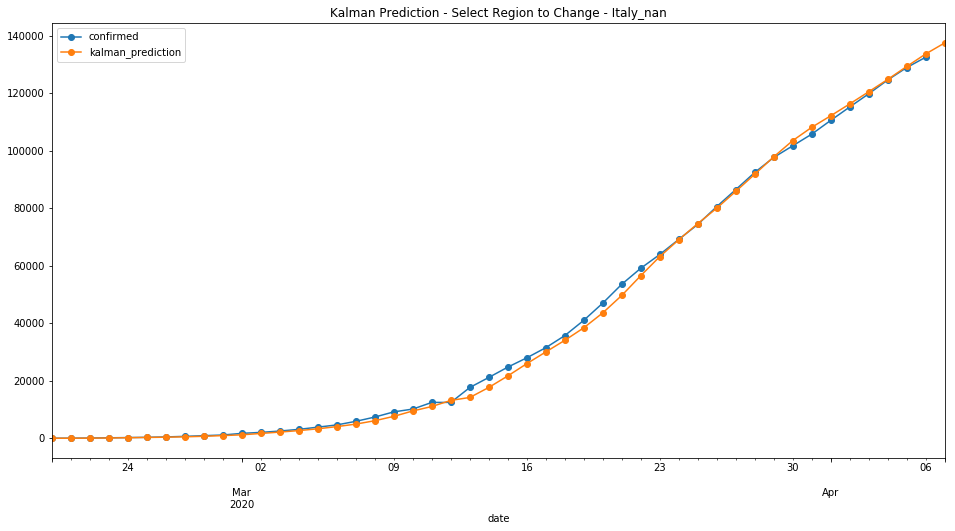

In [40]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
225  Spain_nan  4.546372e+08  21322.222972  4434.148936


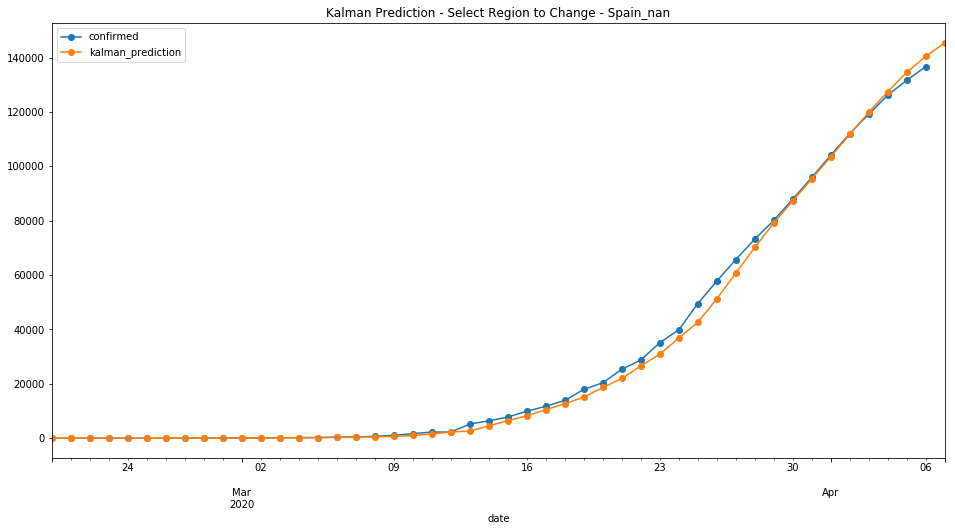

In [41]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
253  United Kingdom_nan  6.674375e+07  8169.684557  1823.255319


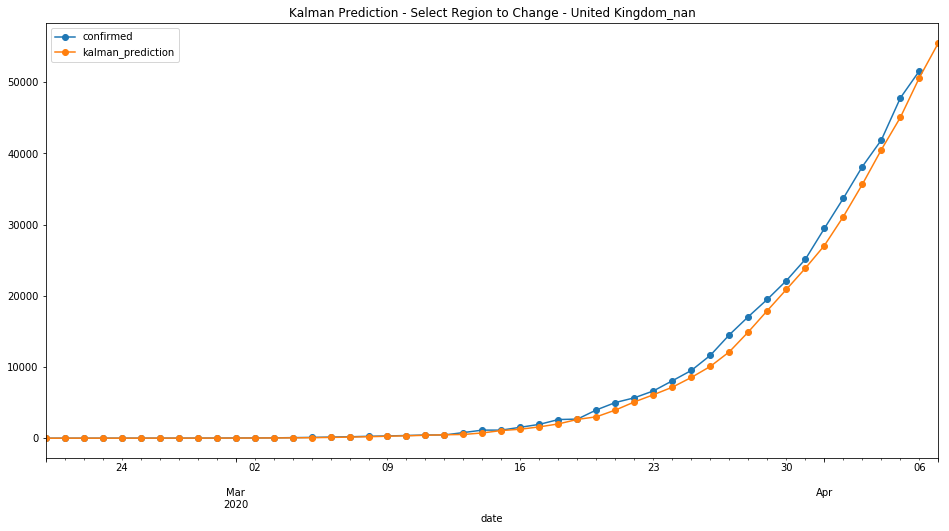

In [42]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse           mae
254  United States_nan  3.369579e+09  58048.078735  12785.234043


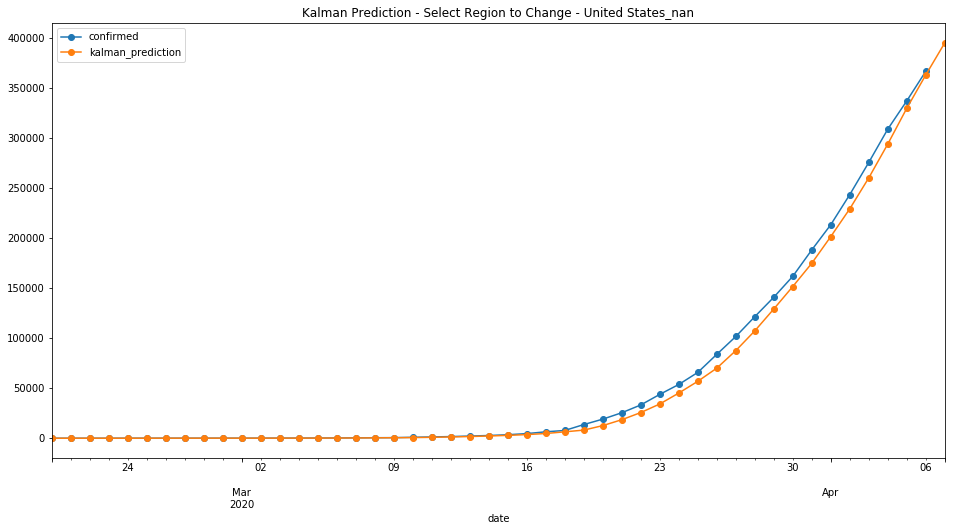

In [43]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse          rmse          mae
130  Germany_nan  2.615673e+08  16173.041709  3388.170213


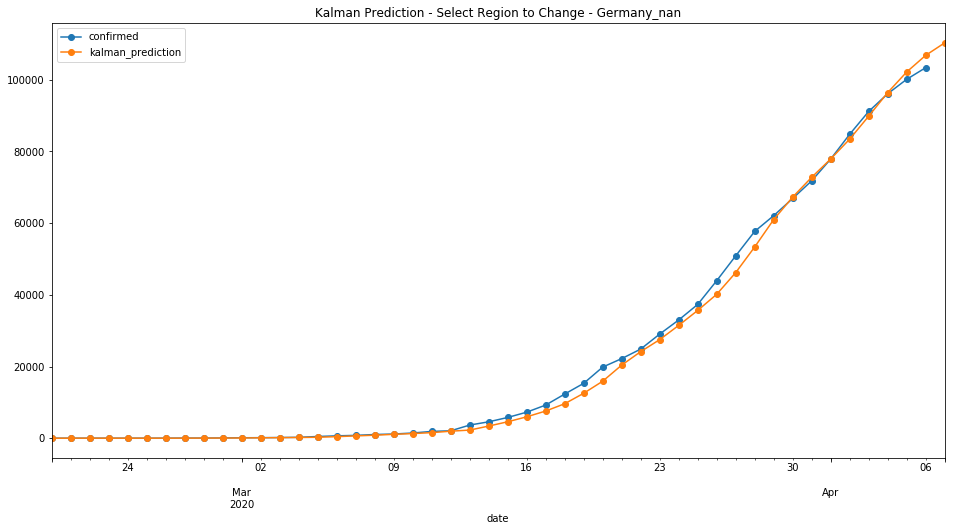

In [44]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse          rmse          mae
126  France_nan  2.539003e+08  15934.250096  3578.978723


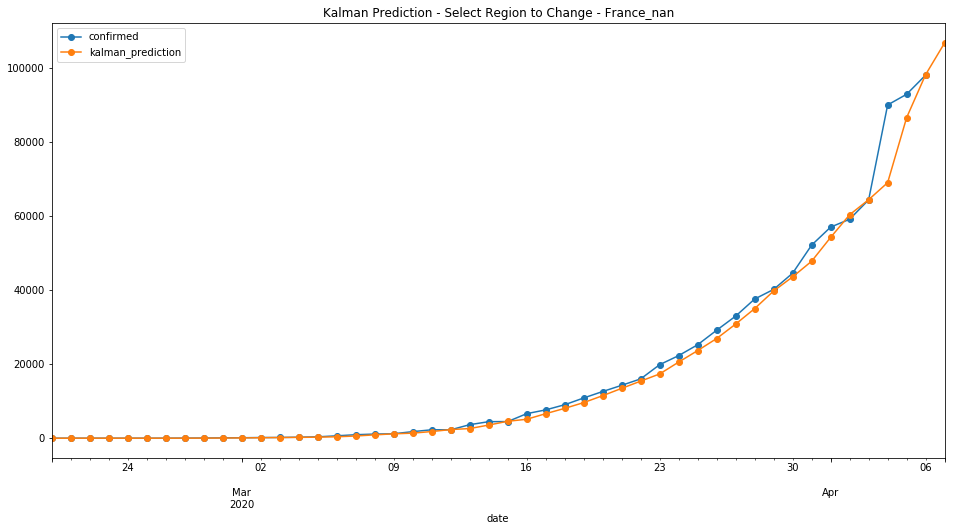

In [45]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region           mse         rmse         mae
230  Switzerland_nan  1.113427e+07  3336.804807  700.787234


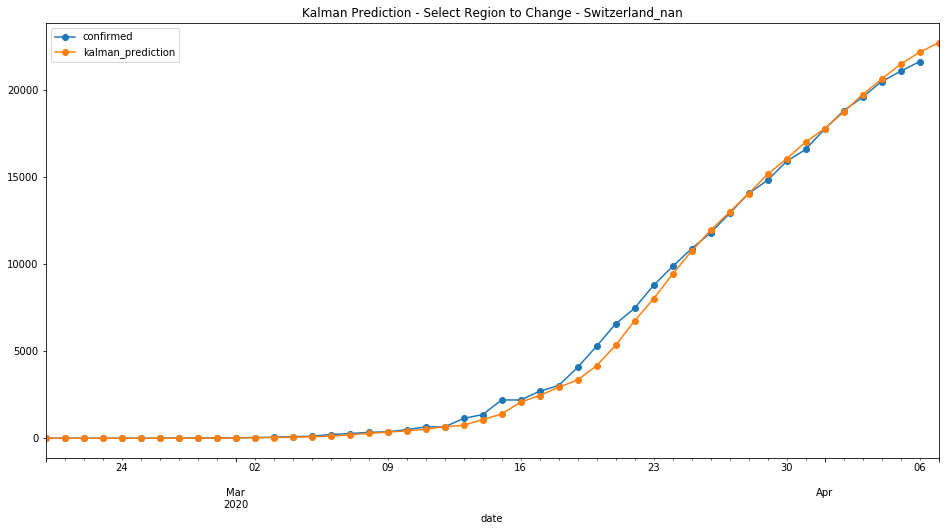

In [46]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse         mae
16  Austria_nan  3.592952e+06  1895.508499  455.574468


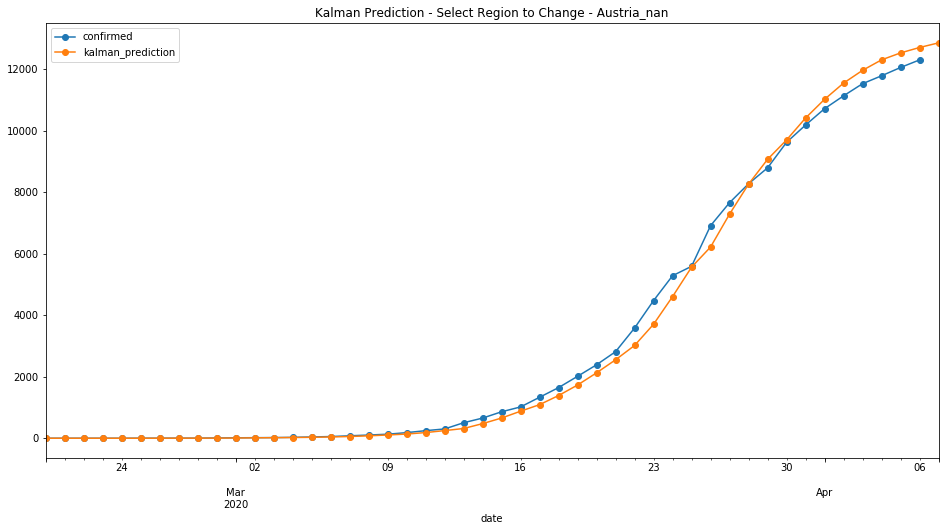

In [47]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse          mae
239  Turkey_nan  2.307840e+07  4803.998556  1109.361702


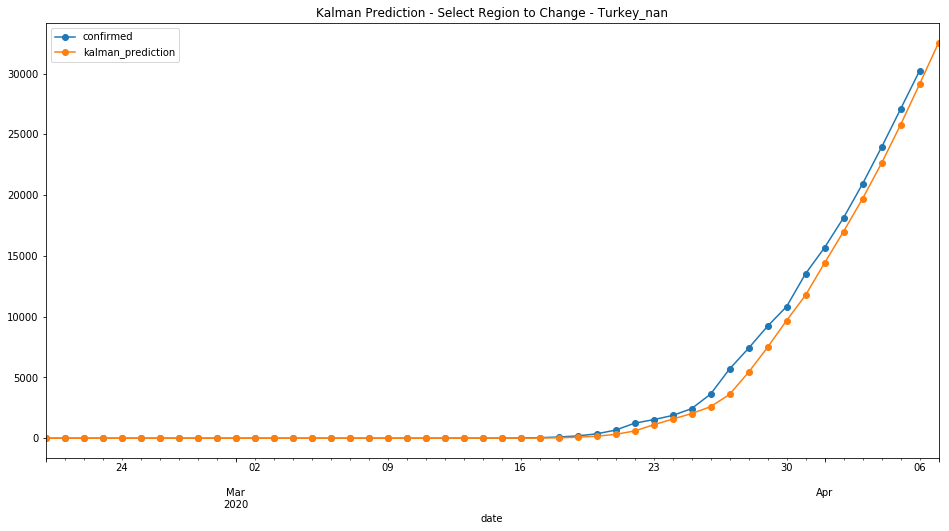

In [48]:
# Select region
region='Turkey_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse         rmse         mae
30  Brazil_nan  3.808141e+06  1951.445765  438.489362


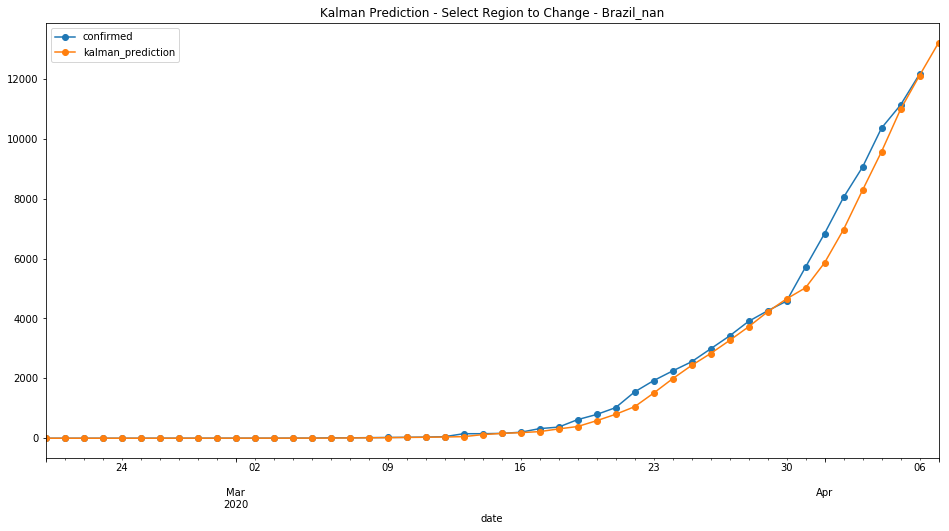

In [49]:
# Select region
region='Brazil_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse         mae
204  Portugal_nan  3.462279e+06  1860.719982  401.744681


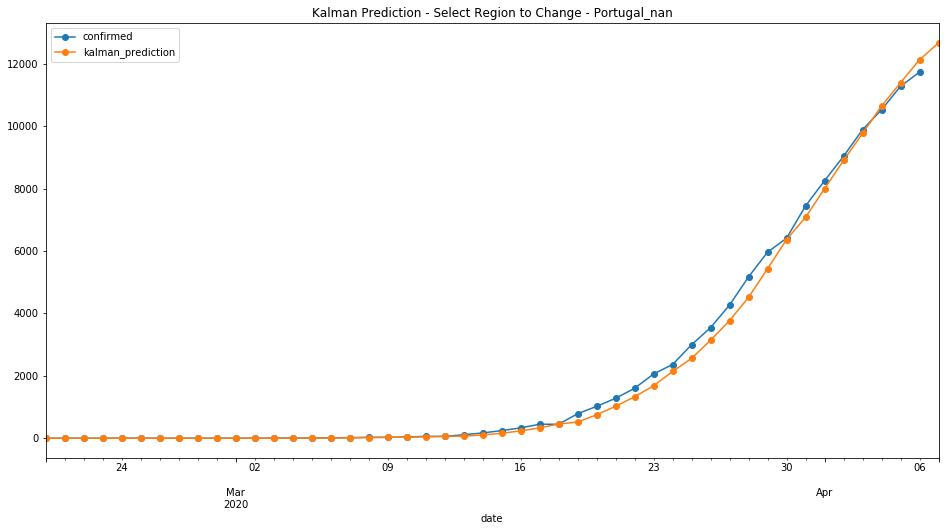

In [50]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

               region           mse         rmse         mae
155  Korea, South_nan  2.370482e+06  1539.636901  393.319149


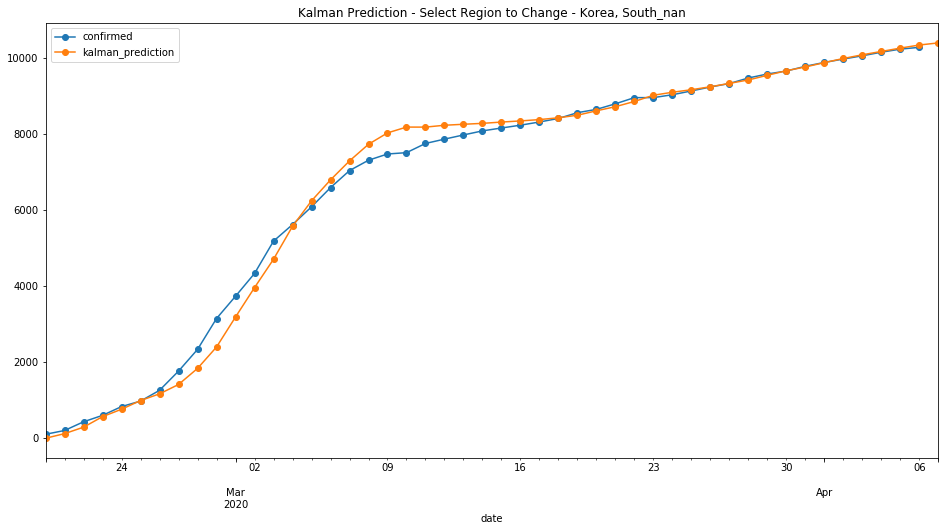

In [51]:
# Select region
region='Korea, South_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [52]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         27 mins 50 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 11 days !!!
H2O cluster name:           H2O_from_python_unknownUser_x1o714
H2O cluster total nodes:    1
H2O cluster free memory:    6.961 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [53]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria',
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan', 
         'Vietnam_nan',
       ]
#

In [54]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-04-06']
boots=train_df[train_df['date']>='2020-04-02'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-04-04']]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-04-01']
test=test[test['date']<'2020-04-08']
test_v2=test[test['region'].isin(region_to_train)]

In [55]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [56]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [57]:
pred2.iloc[175:195]

0  confirmed       date       region
175    5.0         13 2020-04-01    Benin_nan
176   17.0         13 2020-04-02    Benin_nan
177   24.0         16 2020-04-03    Benin_nan
178   25.0         16 2020-04-04    Benin_nan
179   27.0         22 2020-04-05    Benin_nan
180   32.0         26 2020-04-06    Benin_nan
181   42.0          0 2020-04-07    Benin_nan
182   11.0          4 2020-04-01   Bhutan_nan
183    9.0          5 2020-04-02   Bhutan_nan
184    8.0          5 2020-04-03   Bhutan_nan
185   10.0          5 2020-04-04   Bhutan_nan
186   10.0          5 2020-04-05   Bhutan_nan
187    6.0          5 2020-04-06   Bhutan_nan
188    6.0          0 2020-04-07   Bhutan_nan
189  136.0        115 2020-04-01  Bolivia_nan
190  146.0        123 2020-04-02  Bolivia_nan
191  157.0        132 2020-04-03  Bolivia_nan
192  160.0        139 2020-04-04  Bolivia_nan
193  162.0        157 2020-04-05  Bolivia_nan
194  177.0        183 2020-04-06  Bolivia_nan

In [58]:
pred2.iloc[220:240]

0  confirmed       date            region
220  12626.0      12161 2020-04-06        Brazil_nan
221  12626.0      12161 2020-04-06        Brazil_nan
222  14199.0          0 2020-04-07        Brazil_nan
223  14199.0          0 2020-04-07        Brazil_nan
224    135.0        131 2020-04-01        Brunei_nan
225    138.0        133 2020-04-02        Brunei_nan
226    137.0        134 2020-04-03        Brunei_nan
227    138.0        135 2020-04-04        Brunei_nan
228    137.0        135 2020-04-05        Brunei_nan
229    135.0        135 2020-04-06        Brunei_nan
230    134.0          0 2020-04-07        Brunei_nan
231    453.0        422 2020-04-01      Bulgaria_nan
232    459.0        457 2020-04-02      Bulgaria_nan
233    482.0        485 2020-04-03      Bulgaria_nan
234    518.0        503 2020-04-04      Bulgaria_nan
235    527.0        531 2020-04-05      Bulgaria_nan
236    572.0        549 2020-04-06      Bulgaria_nan
237    598.0          0 2020-04-07      Bulgaria_nan
238    308.0        282 2020-04-01  Burkina Faso_nan
239    316.0        288 2020-04-02  Burkina Faso_nan

In [59]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [60]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         3.864818e+15           1.000000    0.313451
1        7_day_change         2.800519e+15           0.724619    0.227132
2            last_day         2.503347e+15           0.647727    0.203030
3        1_day_change         1.301856e+15           0.336848    0.105585
4        3_day_change         1.083503e+15           0.280350    0.087876
5              region         5.321572e+14           0.137693    0.043160
6       infected_rate         1.665326e+14           0.043089    0.013506
7   3_day_change_rate         2.402240e+13           0.006216    0.001948
8                 min         1.888768e+13           0.004887    0.001532
9   1_day_change_rate         1.467341e+13           0.003797    0.001190
10                max         1.359203e+13           0.003517    0.001102
11  7_day_change_rate         6.002125e+12           0.001553    0.000487

In [61]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


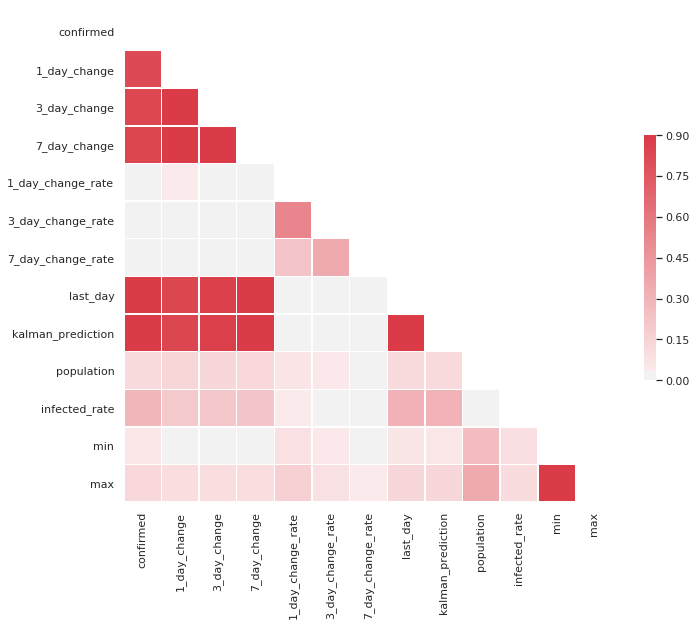

In [62]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [63]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.816248
3_day_change         0.831921
7_day_change         0.837613
1_day_change_rate    0.034485
3_day_change_rate    0.014166
7_day_change_rate    0.005018
last_day             0.916337
kalman_prediction    0.916372
population           0.115812
infected_rate        0.289779
min                  0.053036
max                  0.126918
Name: confirmed, dtype: float64


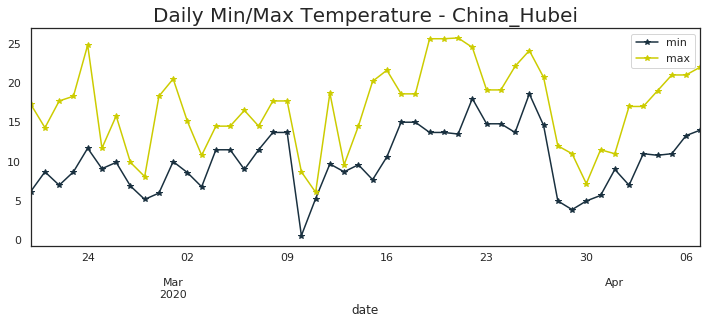

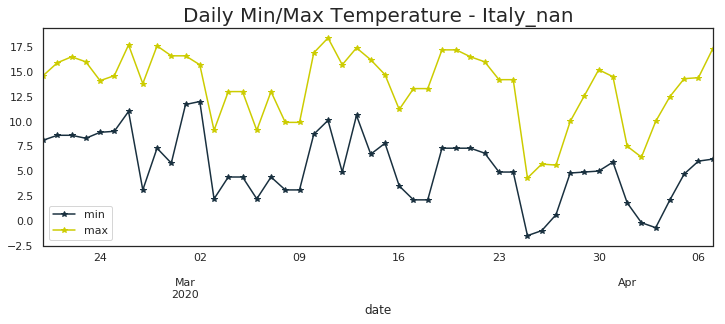

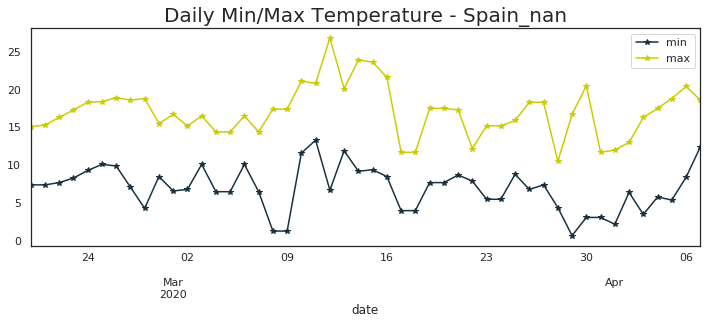

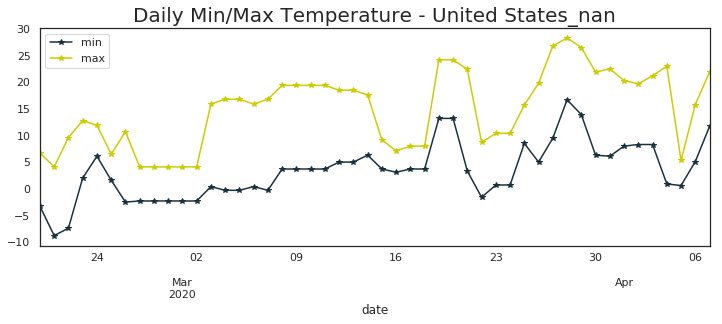

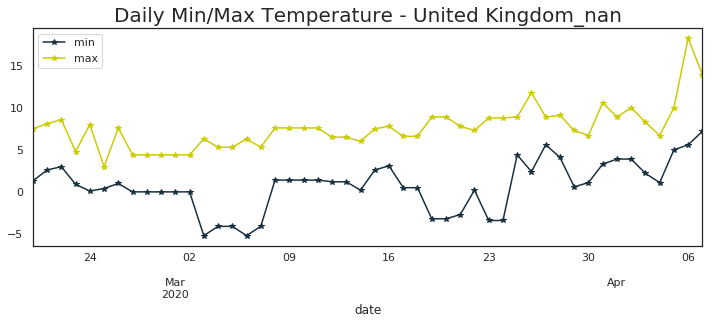

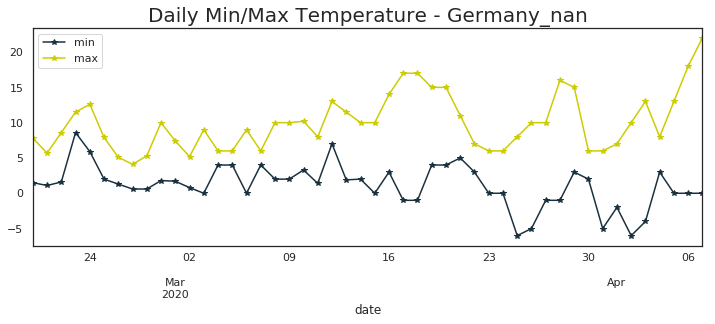

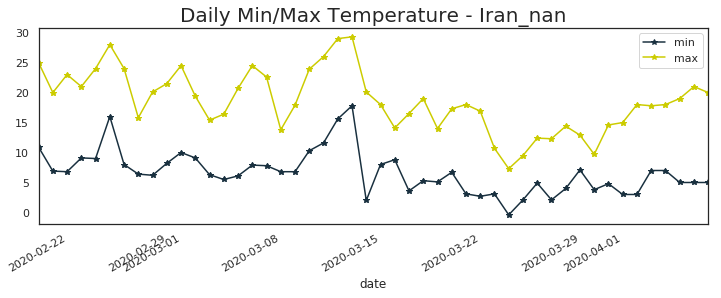

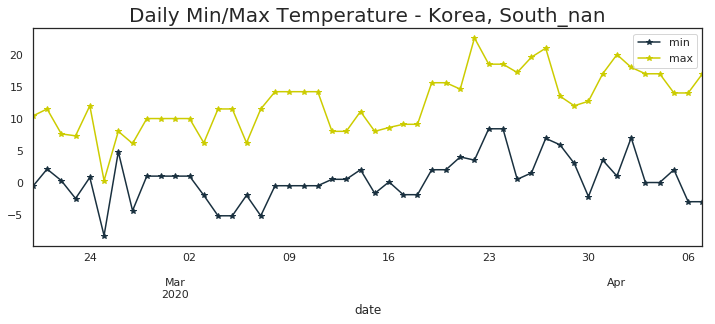

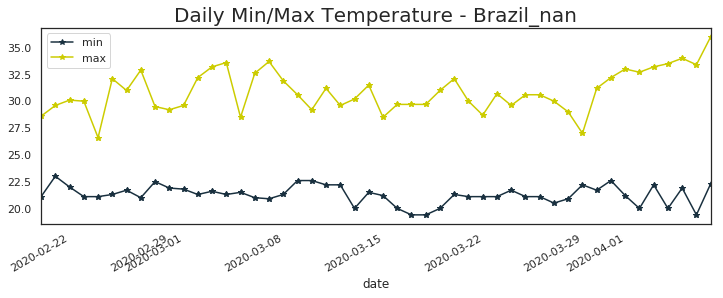

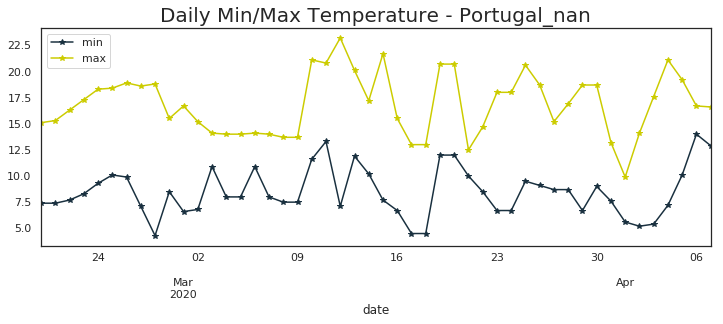

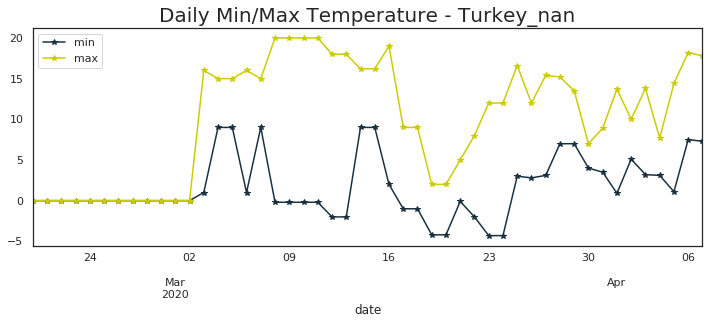

In [64]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan','Korea, South_nan','Brazil_nan','Portugal_nan','Turkey_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [67]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  28.3
Spain_nan                   13.3  26.8
Italy_nan                   12.0  18.4
Germany_nan                  8.6  22.0
France_nan                   9.9  21.1
China_Hubei                 18.6  25.7
Iran_nan                    17.8  29.3
United Kingdom_nan           7.2  18.3
Turkey_nan                   9.0  20.0
Switzerland_nan              8.9  15.7
Belgium_nan                 11.5  23.3
Netherlands_nan             12.2  24.4
Austria_nan                  2.6  11.7
Brazil_nan                  23.0  36.0
Portugal_nan                14.0  23.2
Korea, South_nan             8.4  22.6
Israel_nan                  12.9  24.7
Canada_Quebec                0.0   0.0
Sweden_nan                   2.7  12.2
Russia_nan                   1.3  17.0
Norway_nan                   1.3   5.9
Ireland_nan                  0.0   0.0
Czechia_nan                 

### Kalman X Days Ahead Prediction

In [68]:
%%R

#install.packages('reshape')

NULL


In [69]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:68) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [70]:
all_new=%R all_new

In [71]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

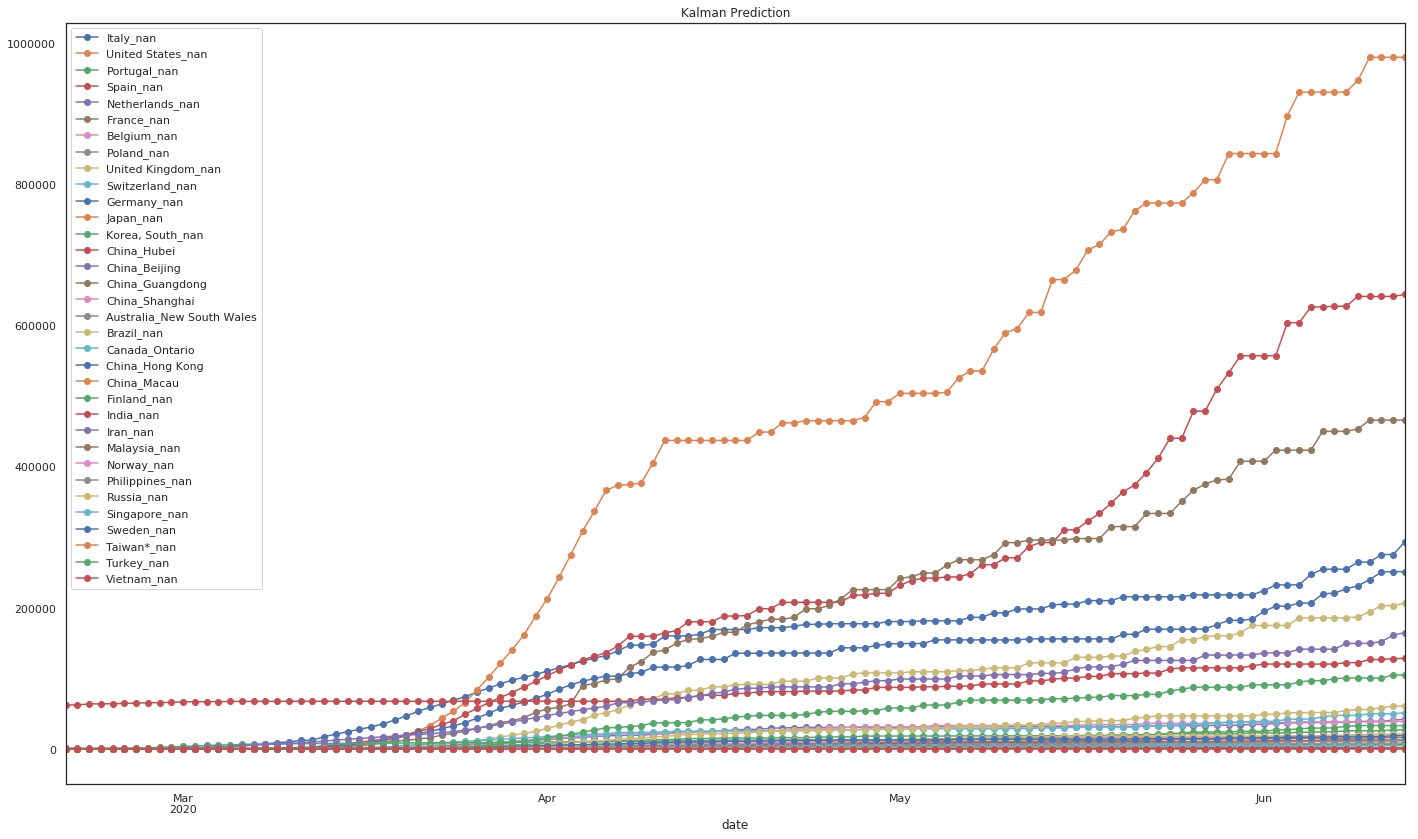

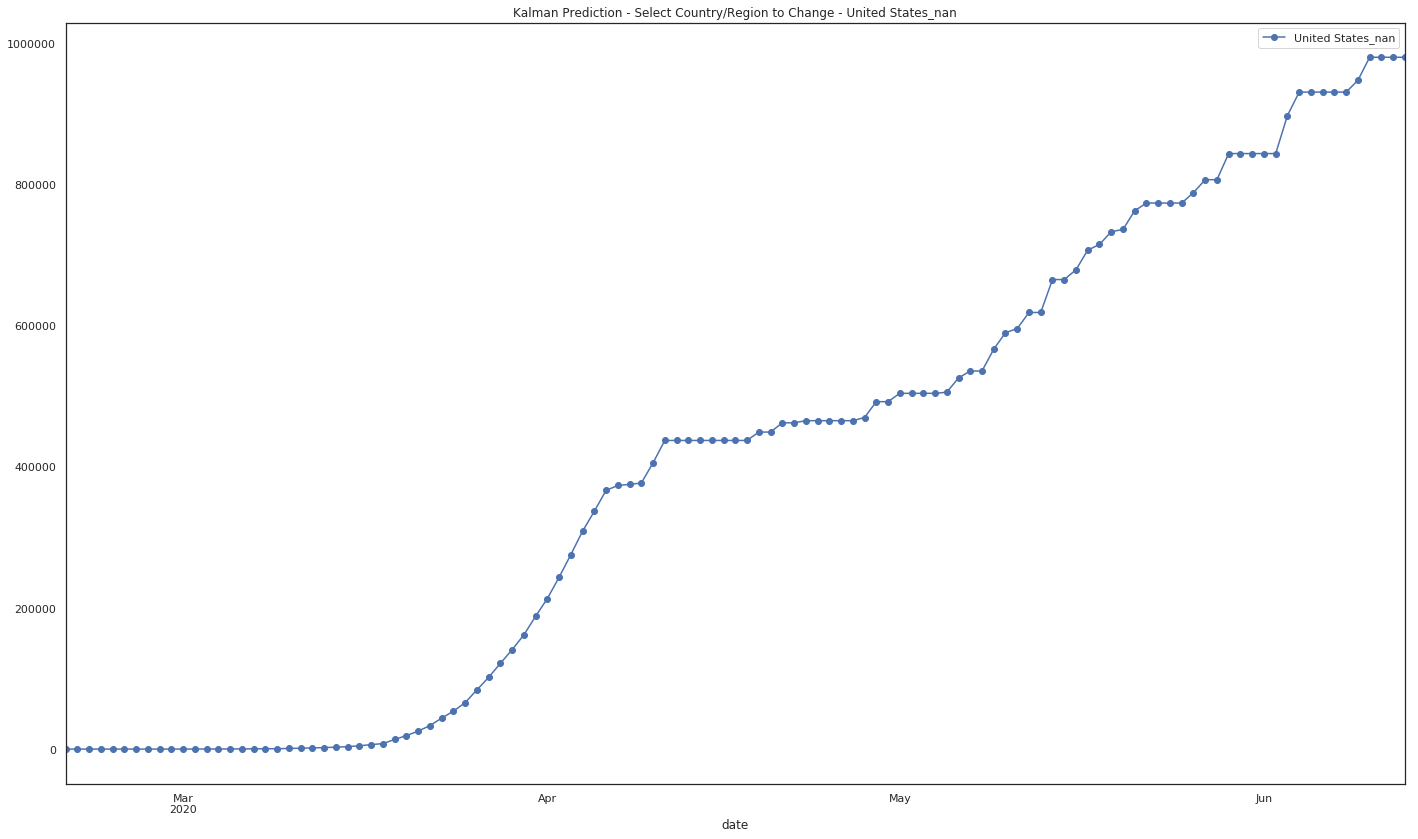

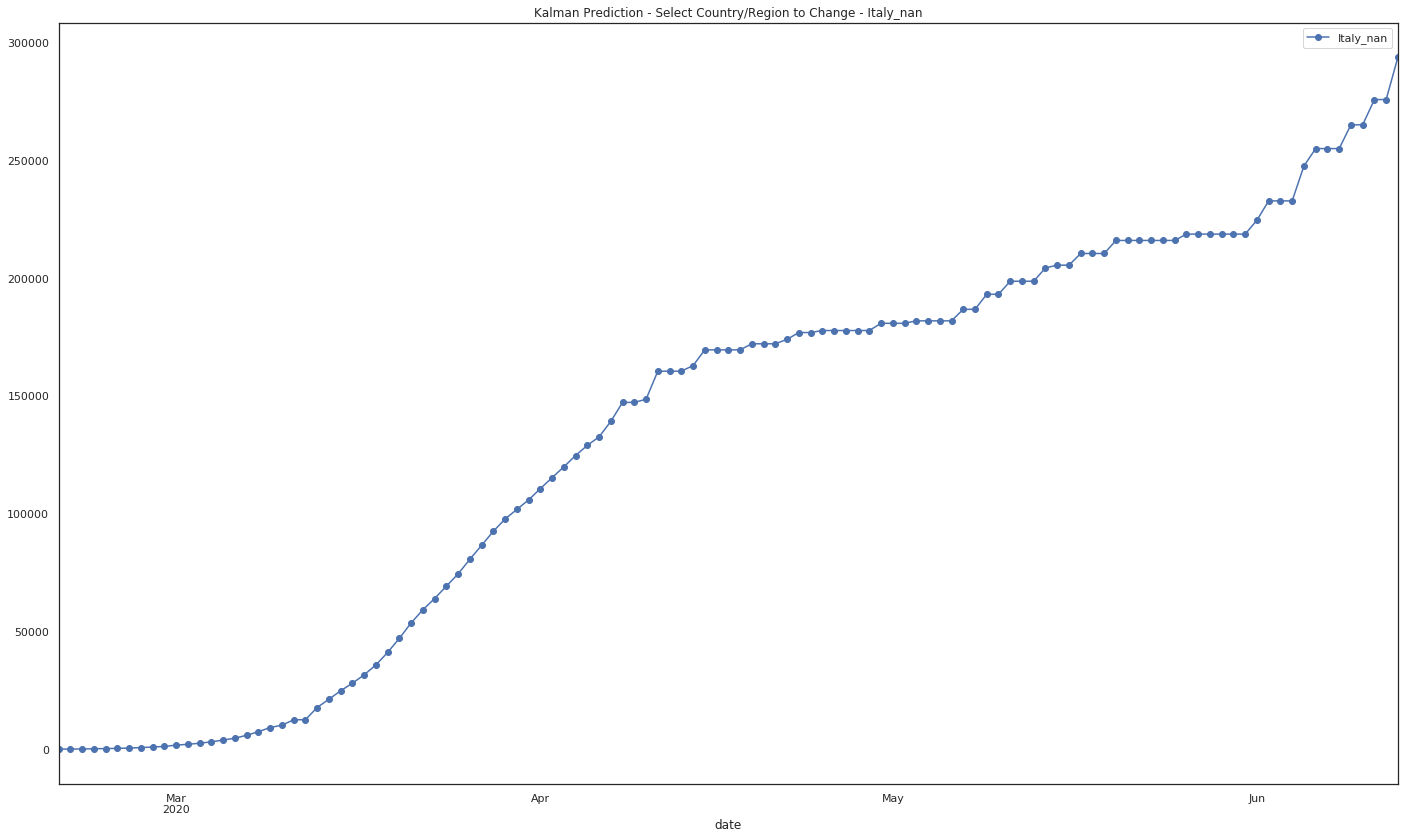

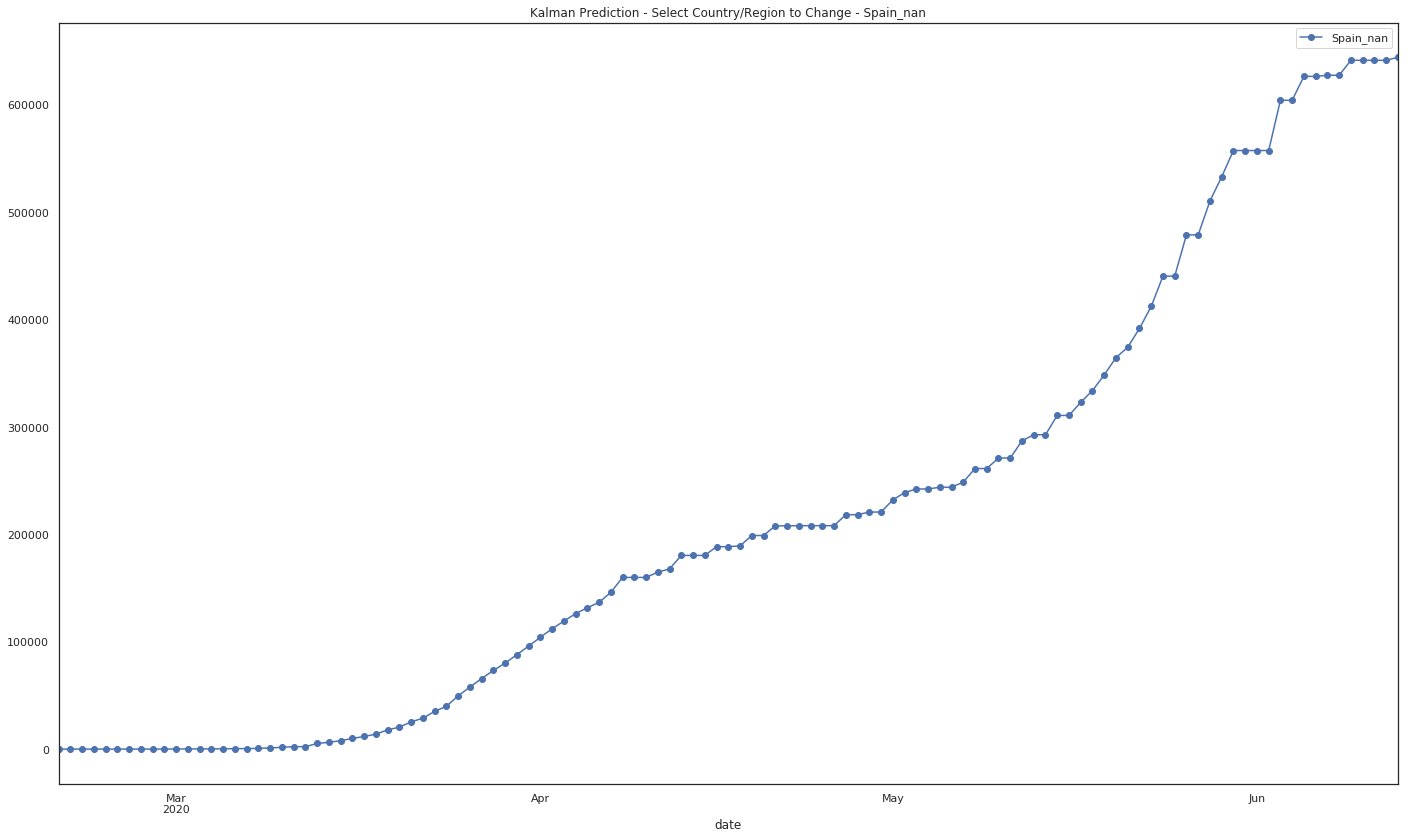

In [157]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman2=all_new[['date','Italy_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


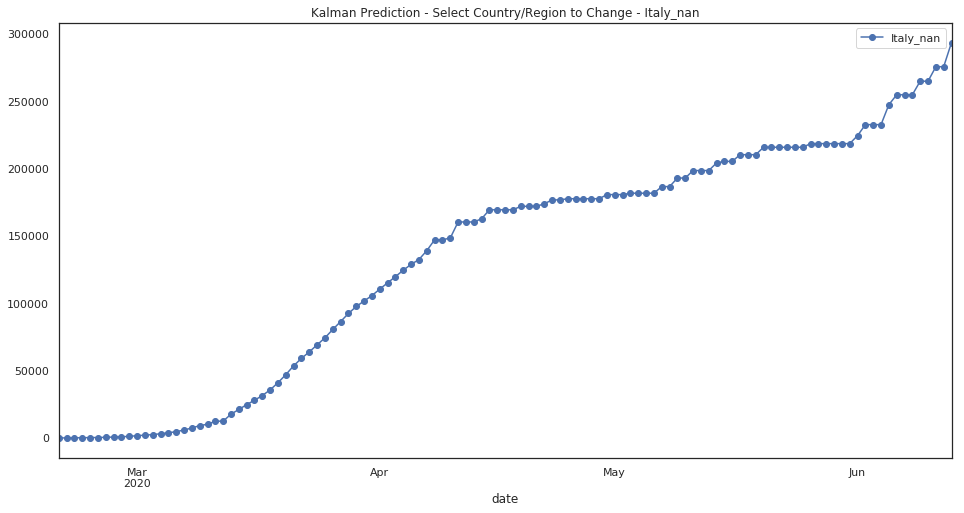

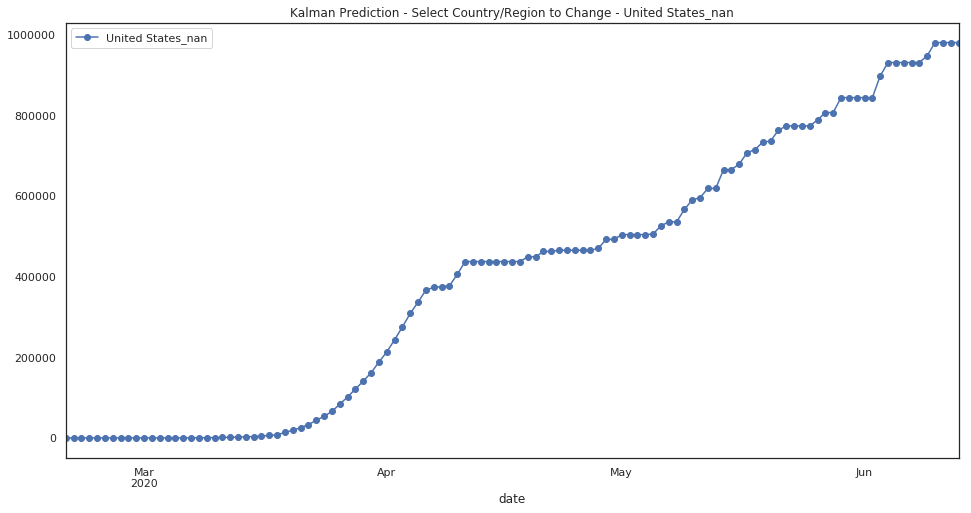

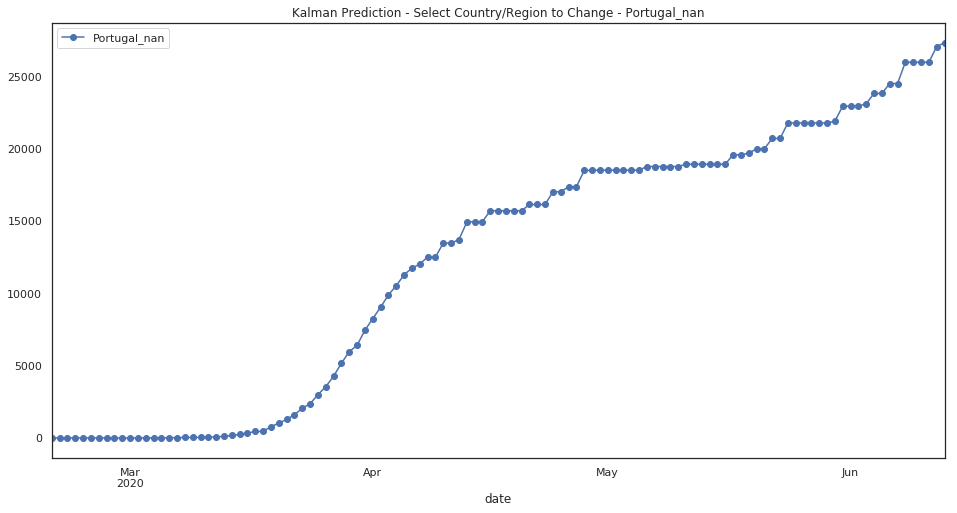

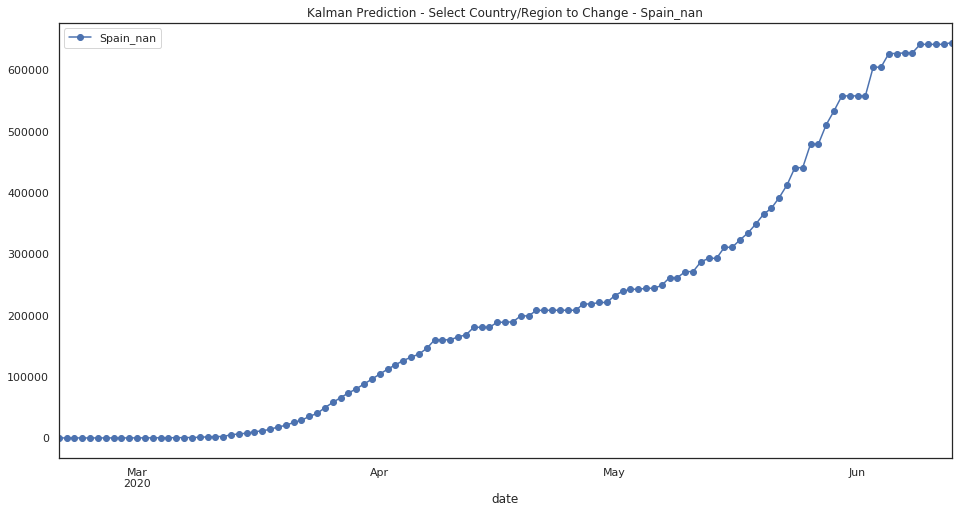

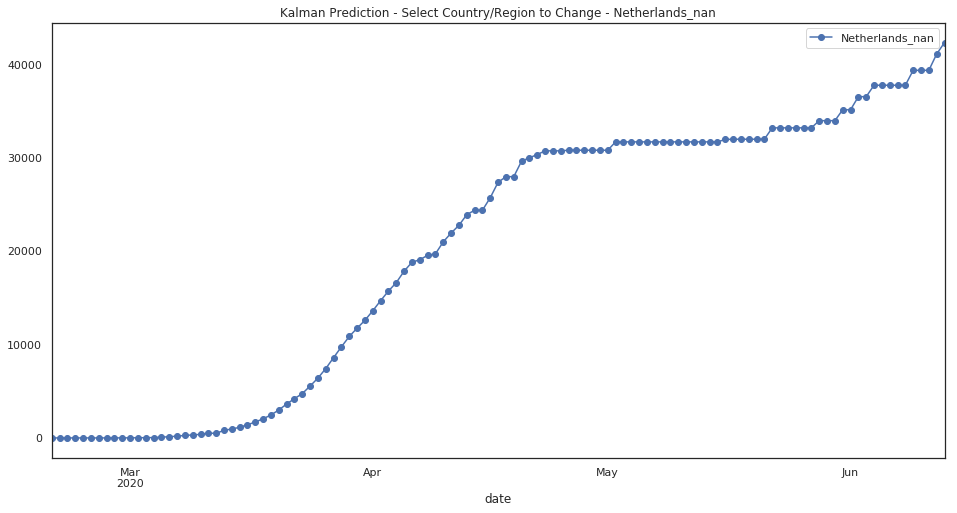

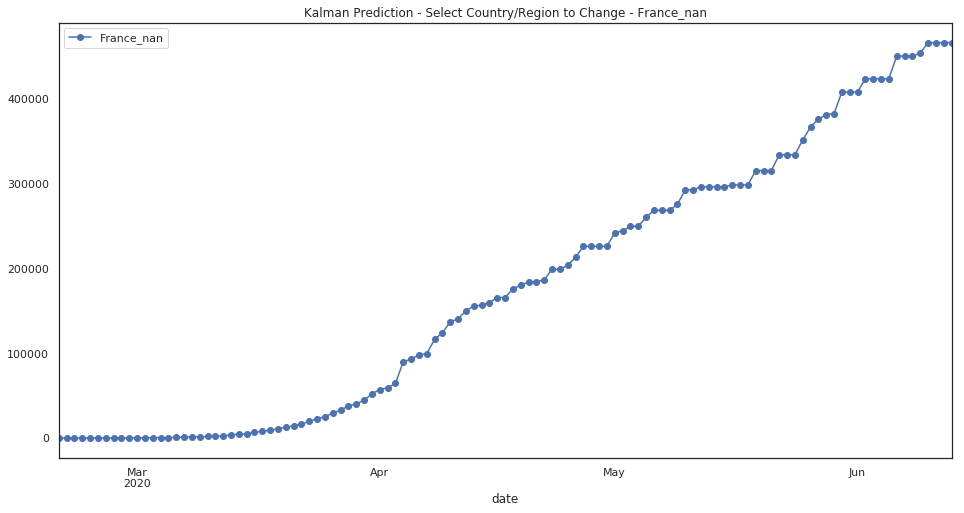

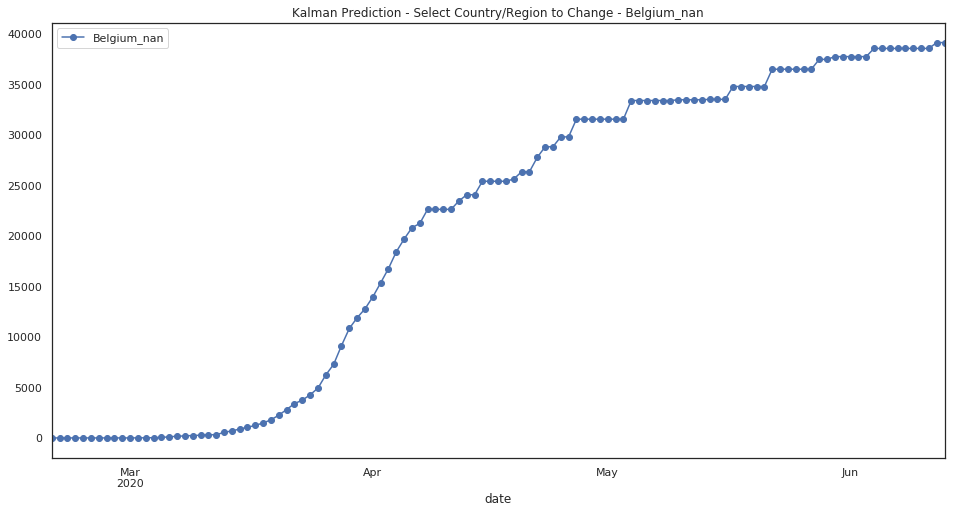

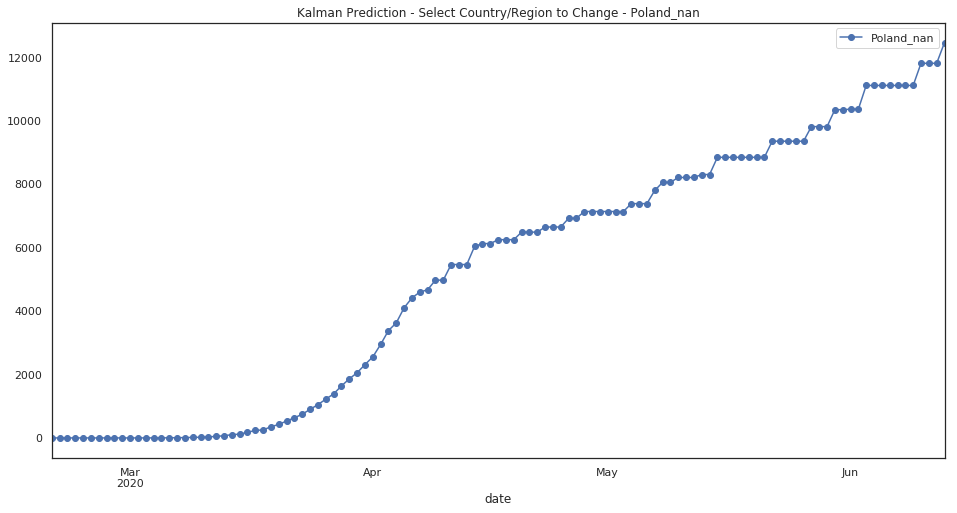

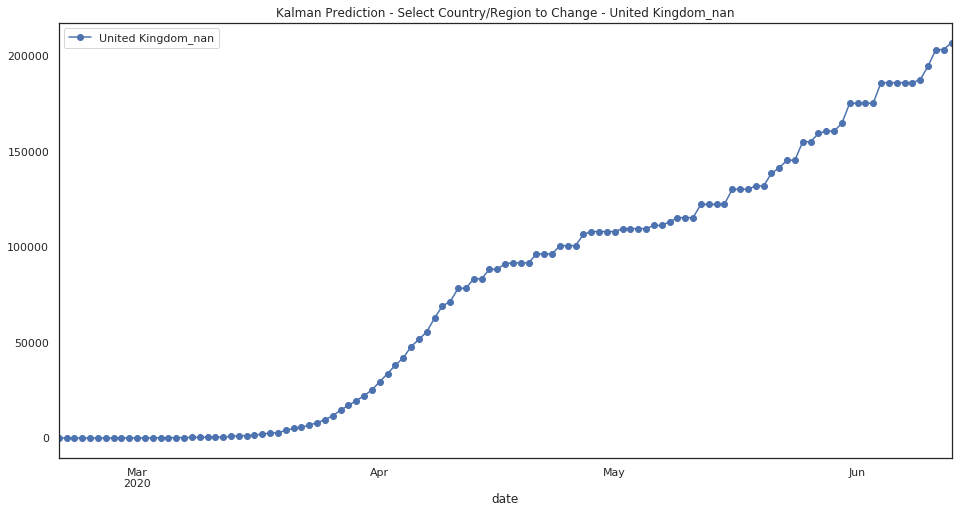

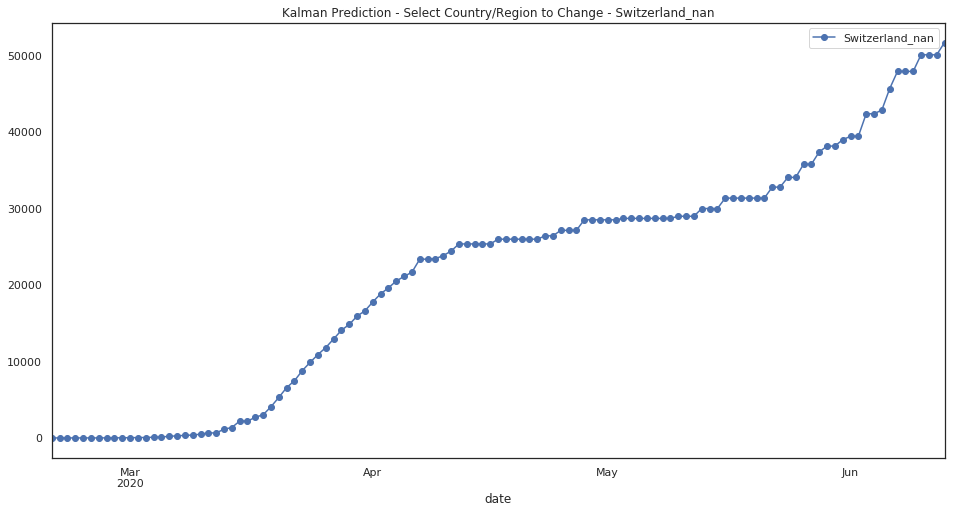

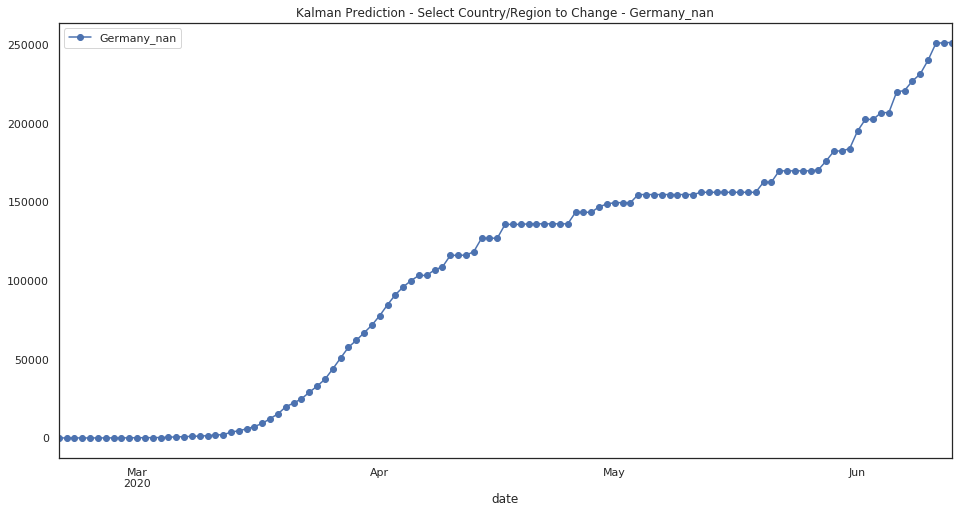

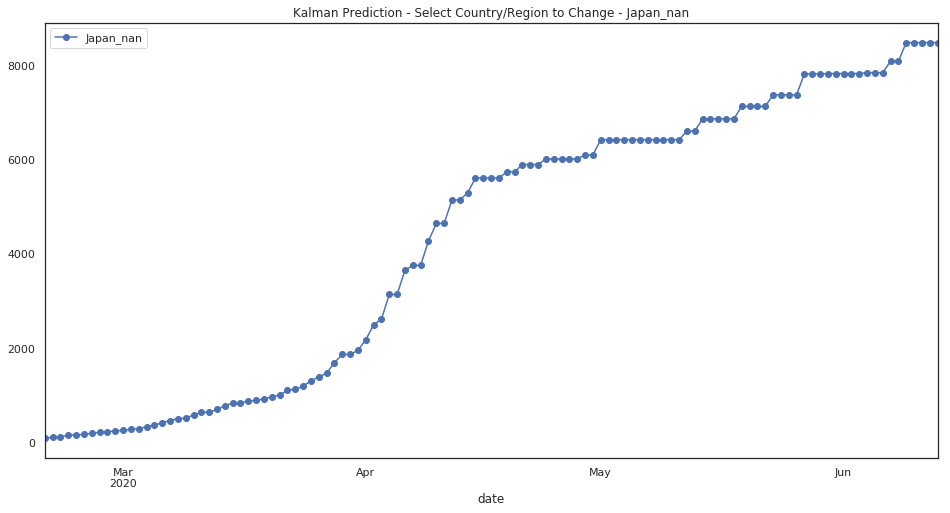

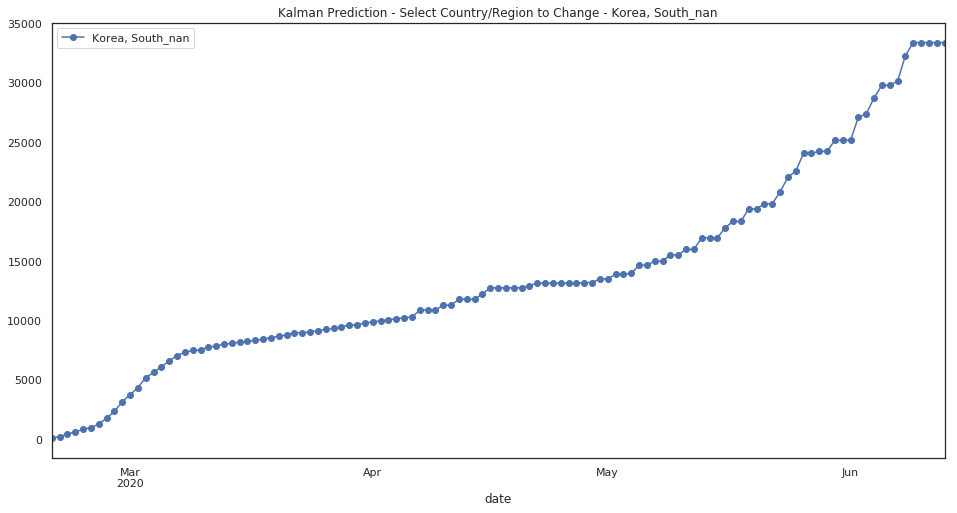

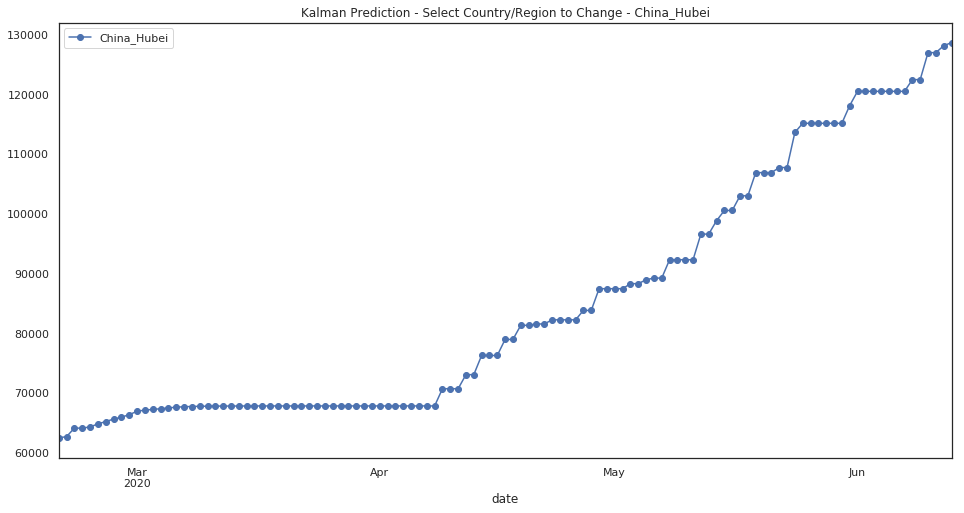

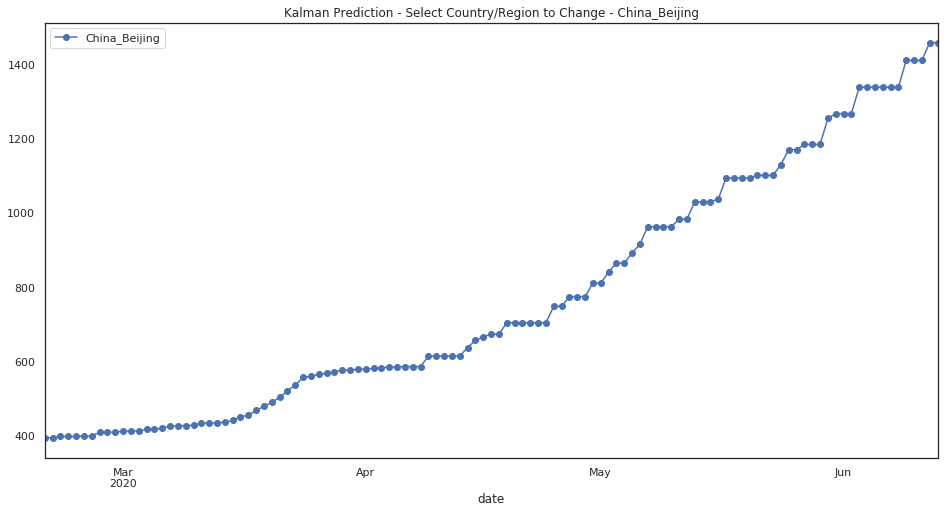

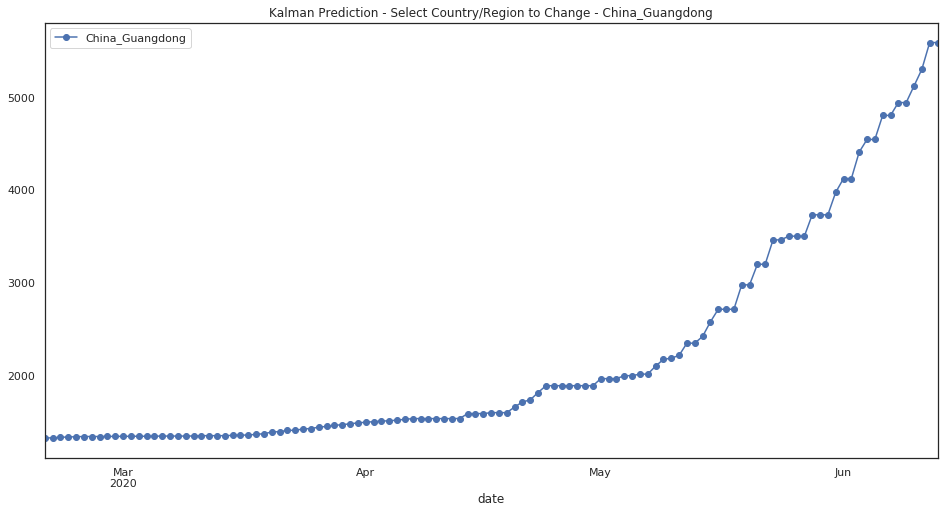

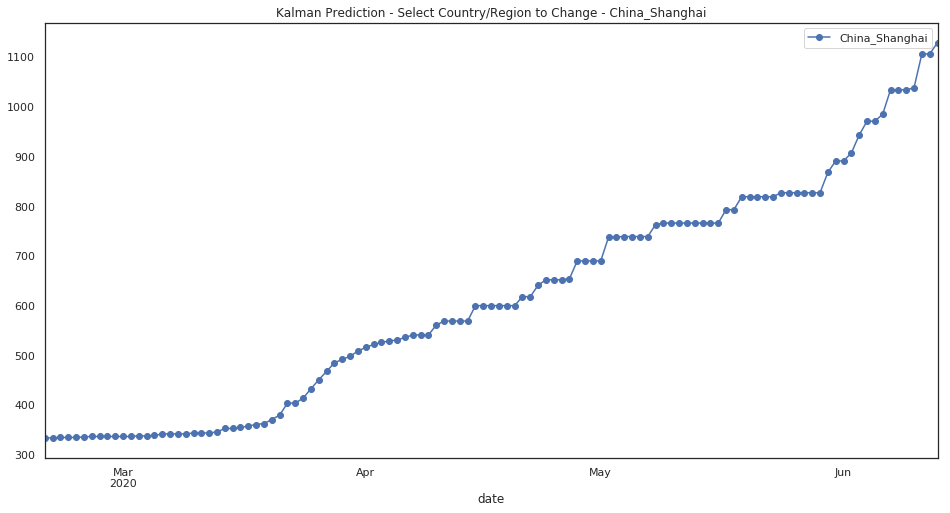

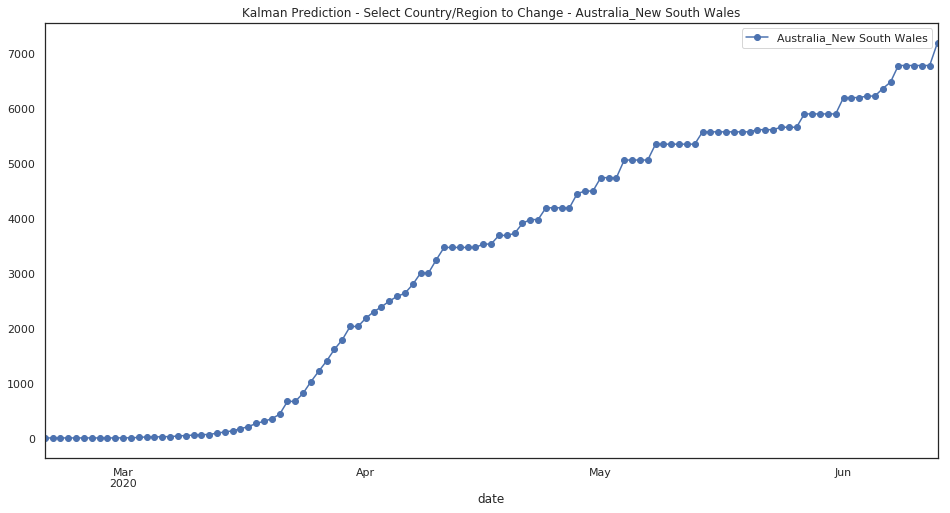

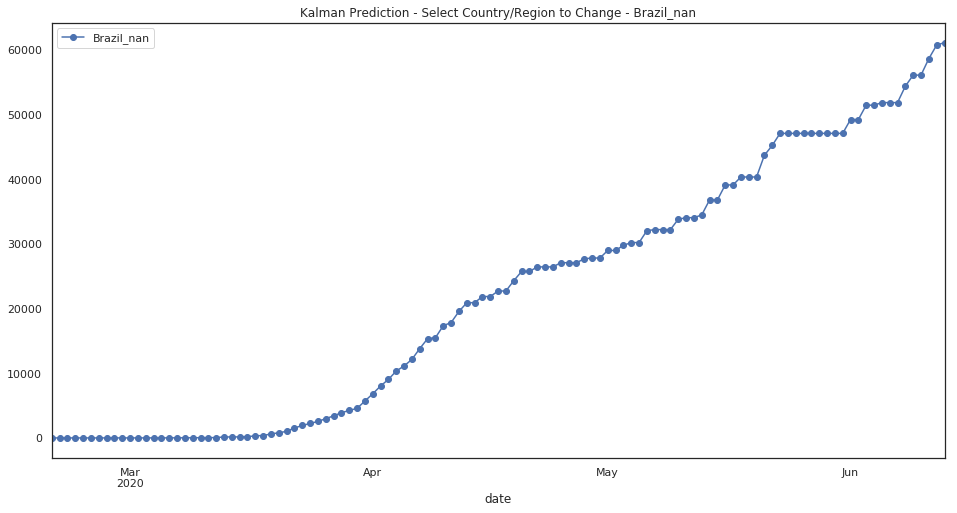

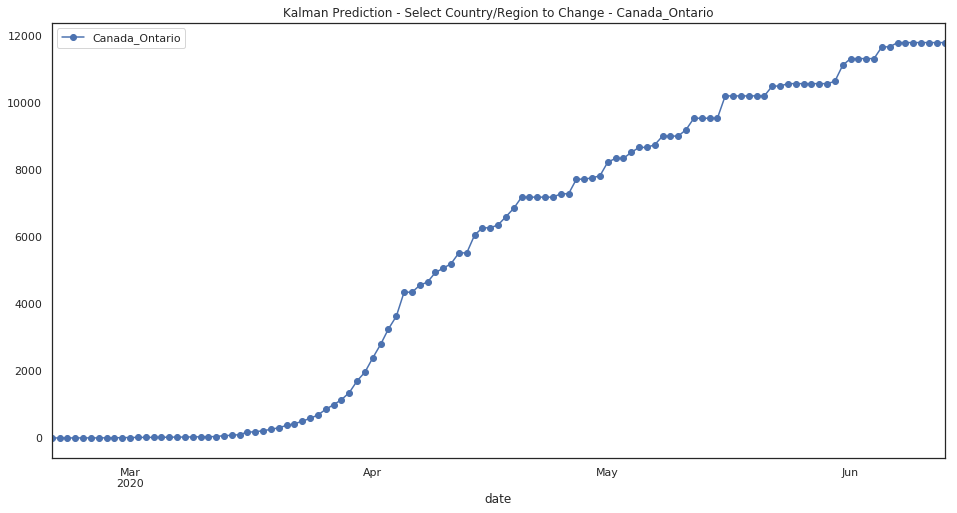

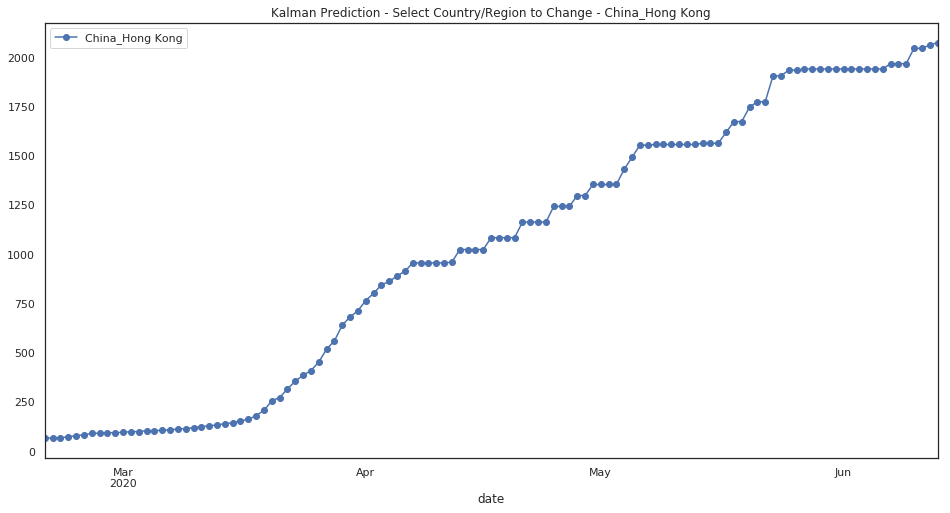

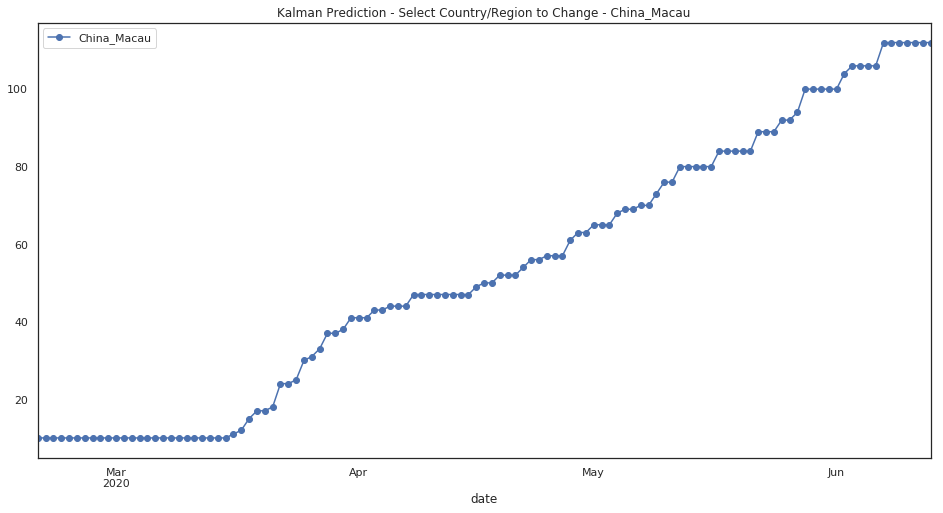

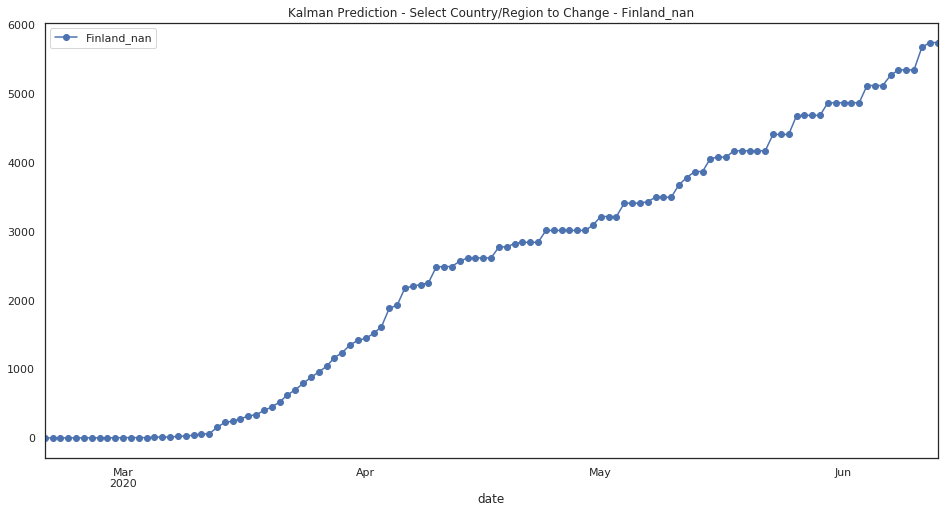

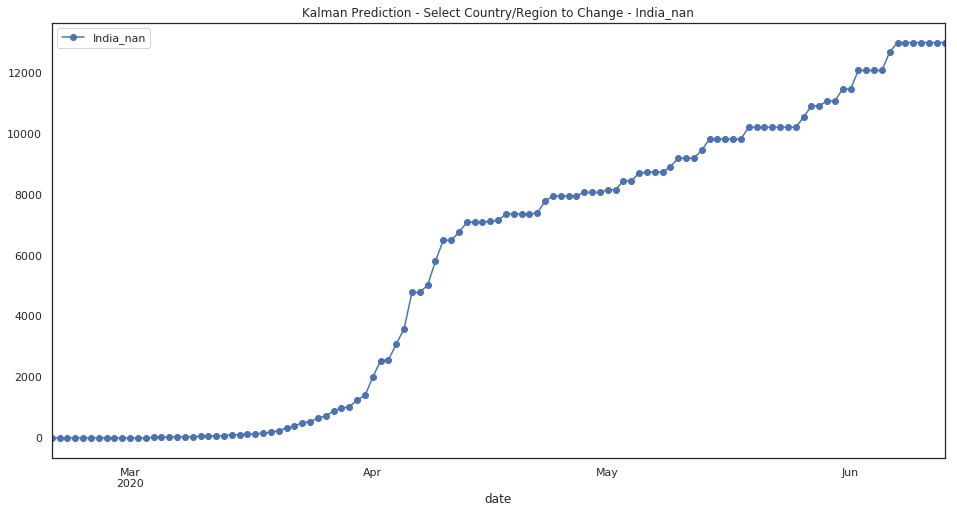

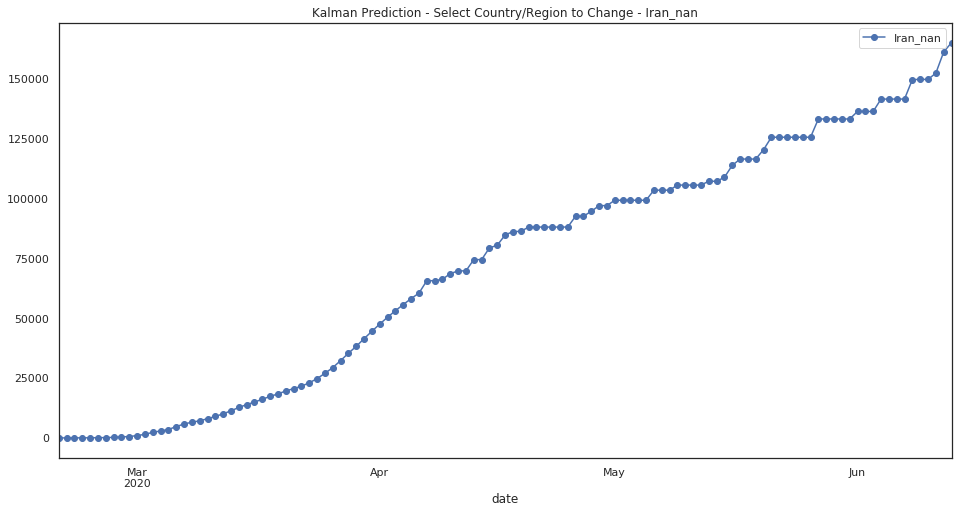

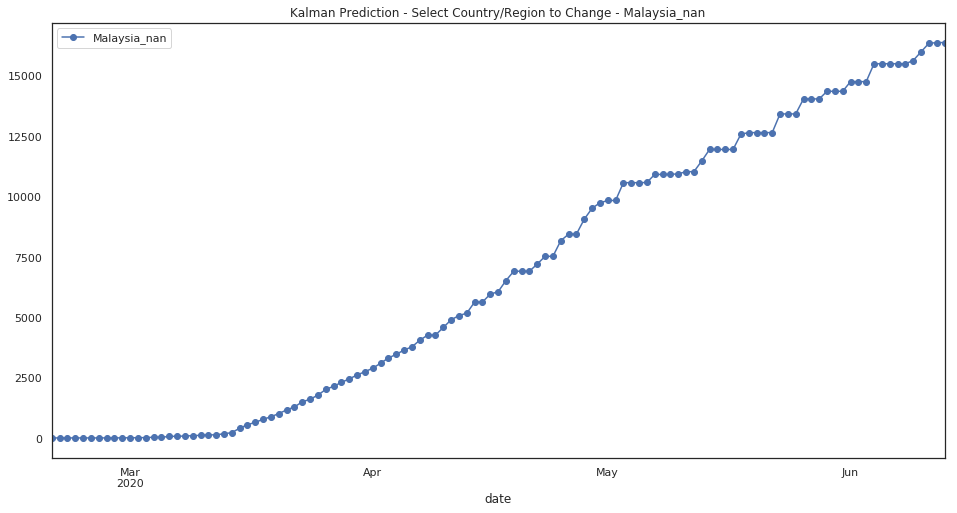

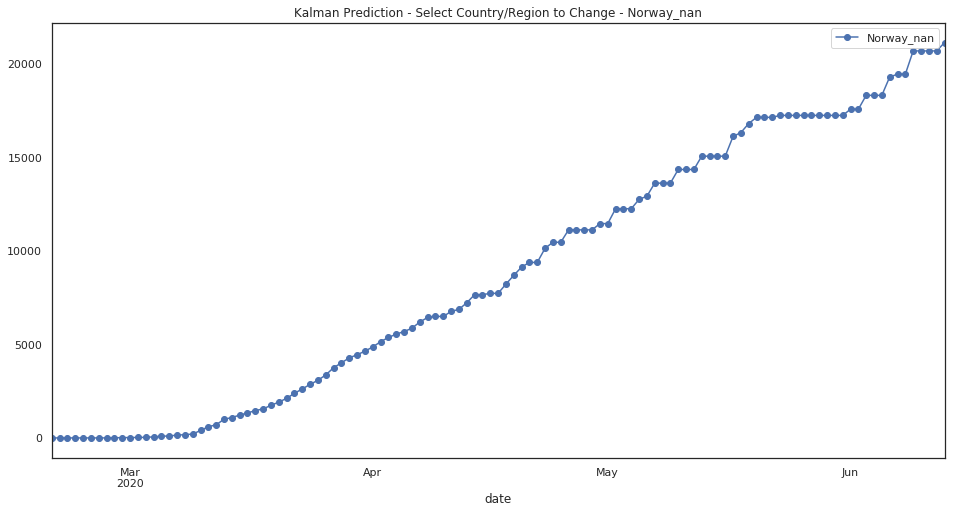

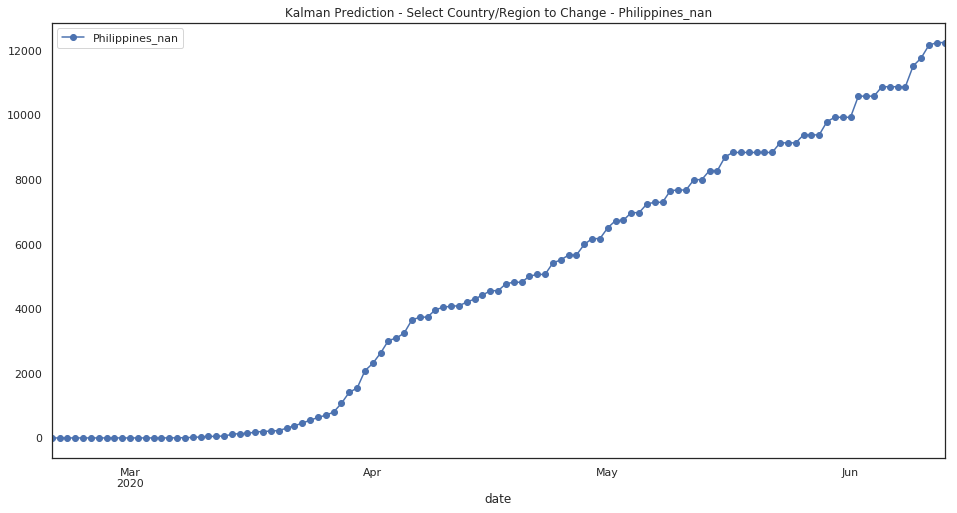

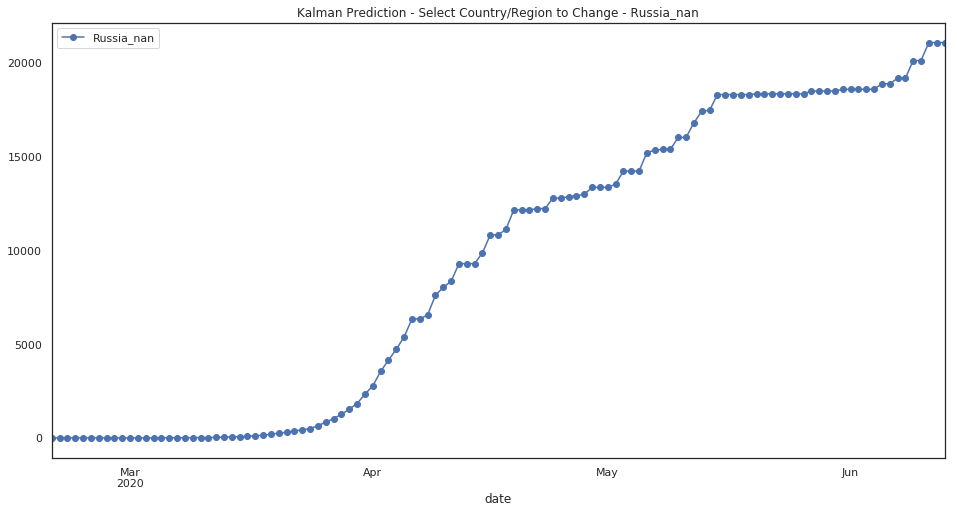

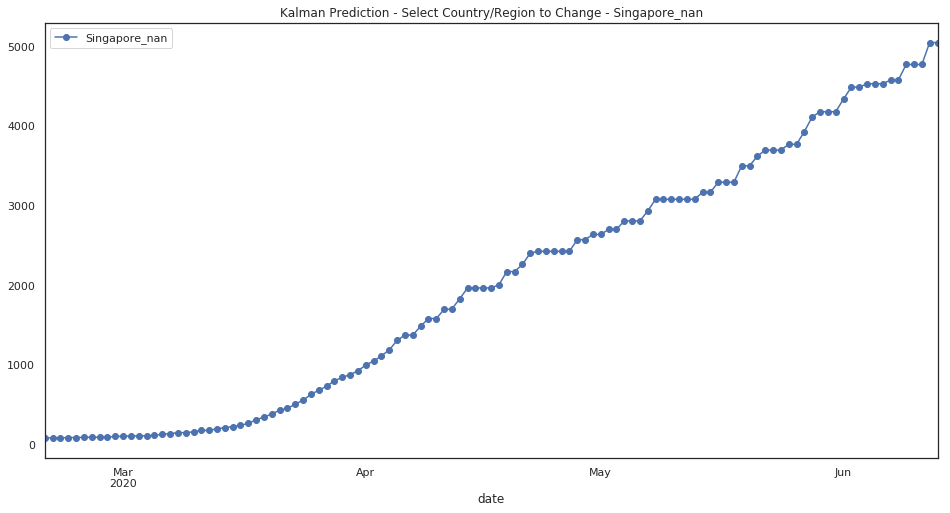

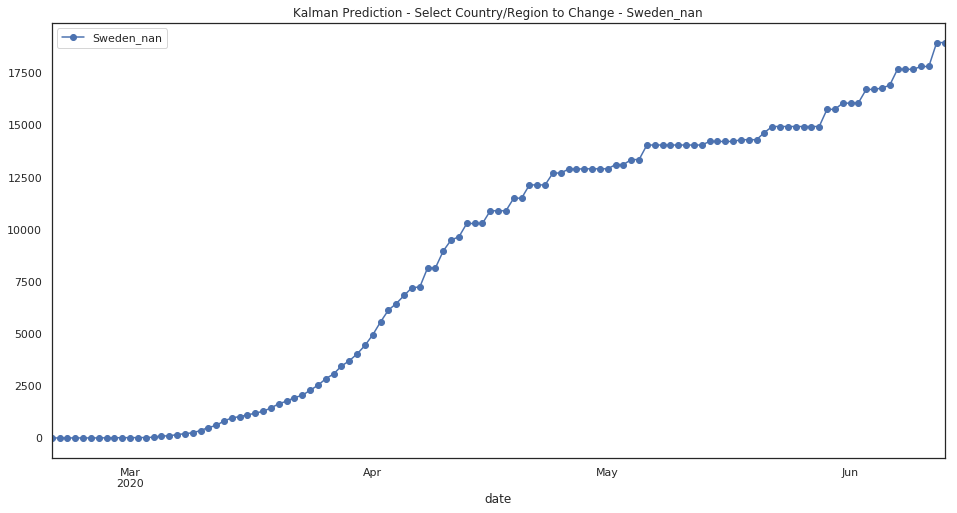

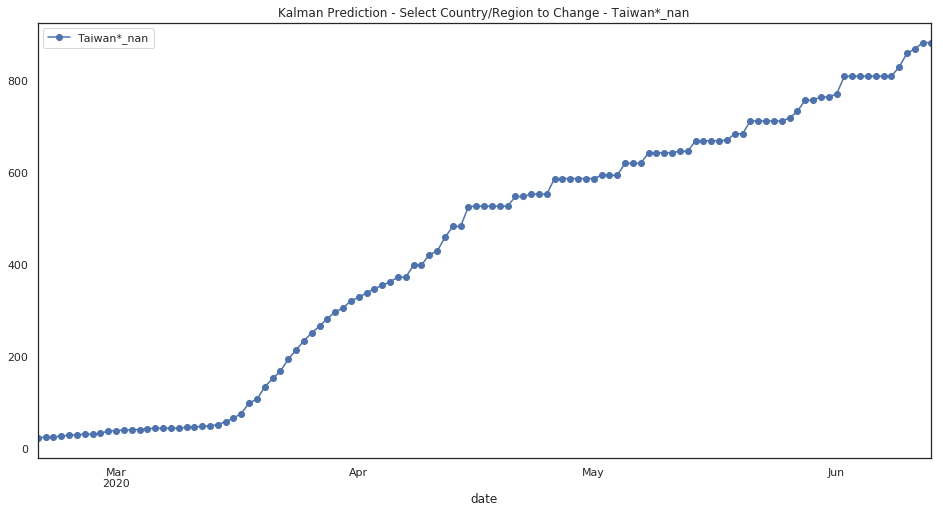

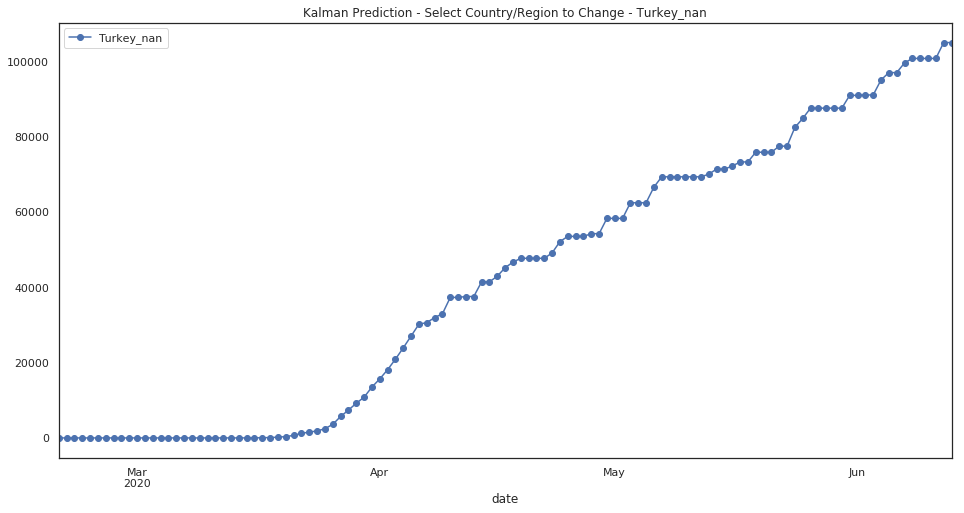

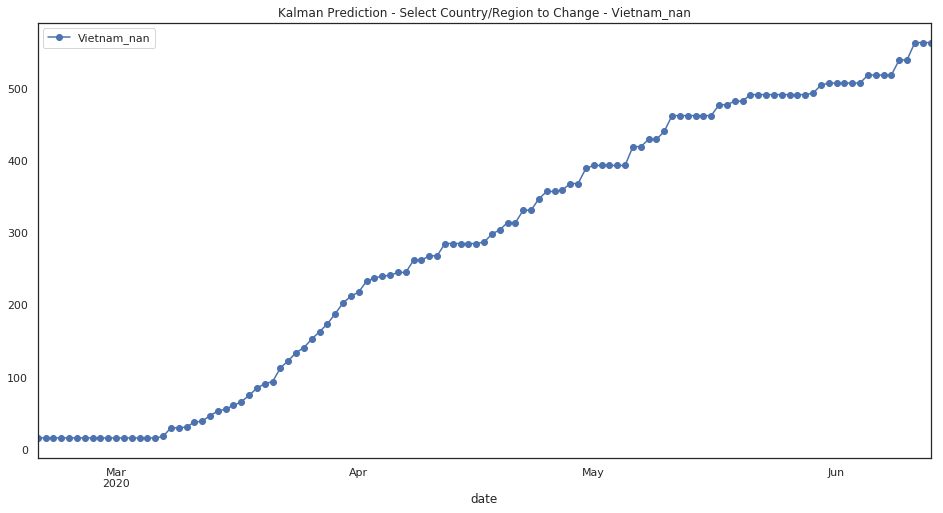

In [159]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [160]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-06-13 00:00:00
dtype: object


0  pred_confirmed
United States_nan                                 980374.0        980374.0
Spain_nan                                         644325.0        644325.0
France_nan                                        466214.0        466214.0
Italy_nan                                         293698.0        293698.0
Germany_nan                                       251434.0        251434.0
United Kingdom_nan                                206891.0        206891.0
Iran_nan                                          165194.0        165194.0
China_Hubei                                       128682.0        128682.0
Turkey_nan                                        105000.0        105000.0
Brazil_nan                                         61159.0         61159.0
Switzerland_nan                                    51650.0         51650.0
Austria_nan                                        46055.0         46055.0
Netherlands_nan                                    42318.0         42318.0
Belgium_nan                                        39142.0         39142.0
Korea, South_nan                                   33413.0         33413.0
Canada_Quebec                                      33385.0         33385.0
Portugal_nan                                       27319.0         27319.0
Israel_nan                                         24796.0         24796.0
Chile_nan                                          23548.0         23548.0
Norway_nan                                         21131.0         21131.0
Russia_nan                                         21077.0         21077.0
Ireland_nan                                        20883.0         20883.0
Sweden_nan                                         18951.0         18951.0
Denmark_nan                                        17033.0         17033.0
Malaysia_nan                                       16386.0         16386.0
Romania_nan                                        14664.0         14664.0
Ecuador_nan                                        14429.0         14429.0
India_nan                                          12975.0         12975.0
Poland_nan                                         12459.0         12459.0
Philippines_nan                                    12240.0         12240.0
...                                                    ...             ...
Sierra Leone_nan                                      22.0            22.0
MS Zaandam_nan                                        21.0            21.0
Mozambique_nan                                        21.0            21.0
Sao Tome and Principe_nan                             20.0            20.0
Western Sahara_nan                                    19.0            19.0
United Kingdom_Turks and Caicos Islands               19.0            19.0
Suriname_nan                                          16.0            16.0
Cabo Verde_nan                                         8.0             8.0
Canada_Yukon                                           7.0             7.0
Holy See_nan                                           7.0             7.0
Somalia_nan                                            7.0             7.0
Canada_Northwest Territories                           7.0             7.0
Mauritania_nan                                         6.0             6.0
France_Saint Barthelemy                                6.0             6.0
Nicaragua_nan                                          6.0             6.0
United Kingdom_Montserrat                              6.0             6.0
Netherlands_Bonaire, Sint Eustatius and Saba           5.0             5.0
Bhutan_nan                                             5.0             5.0
Gambia_nan                                             4.0             4.0
Burundi_nan                                            4.0             4.0
United Kingdom_Falkland Islands (Islas Malvinas)       4.0             4.0
United Kingdom_Anguilla                                3.0             3.0
United 

In [161]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [162]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [184]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [185]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [186]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [187]:
pred[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-05            299.0        333.0       1251.0        466.0   
2020-04-06            349.0        361.0       1320.0        501.0   
2020-04-07            367.0        377.0       1423.0        525.0   
2020-04-08            387.0        408.0       1623.0        542.0   
2020-04-09            416.0        408.0       1623.0        542.0   
2020-04-10            453.0        436.0       1756.0        542.0   
2020-04-11            453.0        461.0       1808.0        555.0   
2020-04-12            493.0        461.0       1973.0        555.0   
2020-04-13            539.0        461.0       1973.0        555.0   
2020-04-14            539.0        495.0       1973.0        555.0   
2020-04-15            539.0        495.0       2009.0        555.0   
2020-04-16            572.0        537.0       2224.0        578.0   
2020-04-17            572.0        537.0       2224.0        598.0   
2020-04-18            572.0        537.0       2272.0        598.0   
2020-04-19            622.0        564.0       2285.0        612.0   
2020-04-20            622.0        574.0       2285.0        612.0   
2020-04-21            622.0        574.0       2285.0        612.0   
2020-04-22            661.0        619.0       2285.0        656.0   
2020-04-23            661.0        641.0       2360.0        656.0   
2020-04-24            661.0        641.0       2360.0        678.0   
2020-04-25            685.0        641.0       2360.0        678.0   
2020-04-26            685.0        683.0       2360.0        710.0   
2020-04-27            685.0        683.0       2442.0        753.0   
2020-04-28            709.0        683.0       2442.0        780.0   
2020-04-29            709.0        683.0       2442.0        780.0   
2020-04-30            746.0        683.0       2442.0        794.0   
2020-05-01            746.0        683.0       2442.0        794.0   
2020-05-02            746.0        683.0       2442.0        794.0   
2020-05-03            746.0        697.0       2442.0        800.0   
2020-05-04            746.0        697.0       2442.0        844.0   
...                     ...          ...          ...          ...   
2020-05-16            827.0        857.0       2618.0       1012.0   
2020-05-17            827.0        875.0       2618.0       1012.0   
2020-05-18            827.0        875.0       2618.0       1074.0   
2020-05-19            827.0        875.0       2618.0       1121.0   
2020-05-20            827.0        875.0       2730.0       1121.0   
2020-05-21            827.0        875.0       2730.0       1121.0   
2020-05-22            864.0        893.0       2730.0       1201.0   
2020-05-23            867.0        893.0       2750.0       1201.0   
2020-05-24            867.0        937.0       2750.0       1201.0   
2020-05-25            867.0        937.0       2777.0       1287.0   
2020-05-26            867.0        937.0       2861.0       1303.0   
2020-05-27            867.0        954.0       2991.0       1307.0   
2020-05-28            918.0        970.0       2991.0       1307.0   
2020-05-29            926.0       1007.0       2991.0       1307.0   
2020-05-30            926.0       1007.0       3070.0       1307.0   
2020-05-31            926.0       1073.0       3070.0       1389.0   
2020-06-01            934.0       1074.0       3070.0       1389.0   
2020-06-02            991.0       1150.0       3106.0       1389.0   
2020-06-03            991.0       1150.0       3106.0       1456.0   
2020-06-04           1045.0       1220.0       3106.0       1456.0   
2020-06-05           1045.0       1262.0       3106.0       1456.0   
2020-06-06           1110.0       1262.0       3106.0       1473.0   
2020-06-07           1110.0       1262.0       3106.0       1551.0   
2020-06-08           1110.0       1262.0       3106.0       1572.0   
2020-06-09

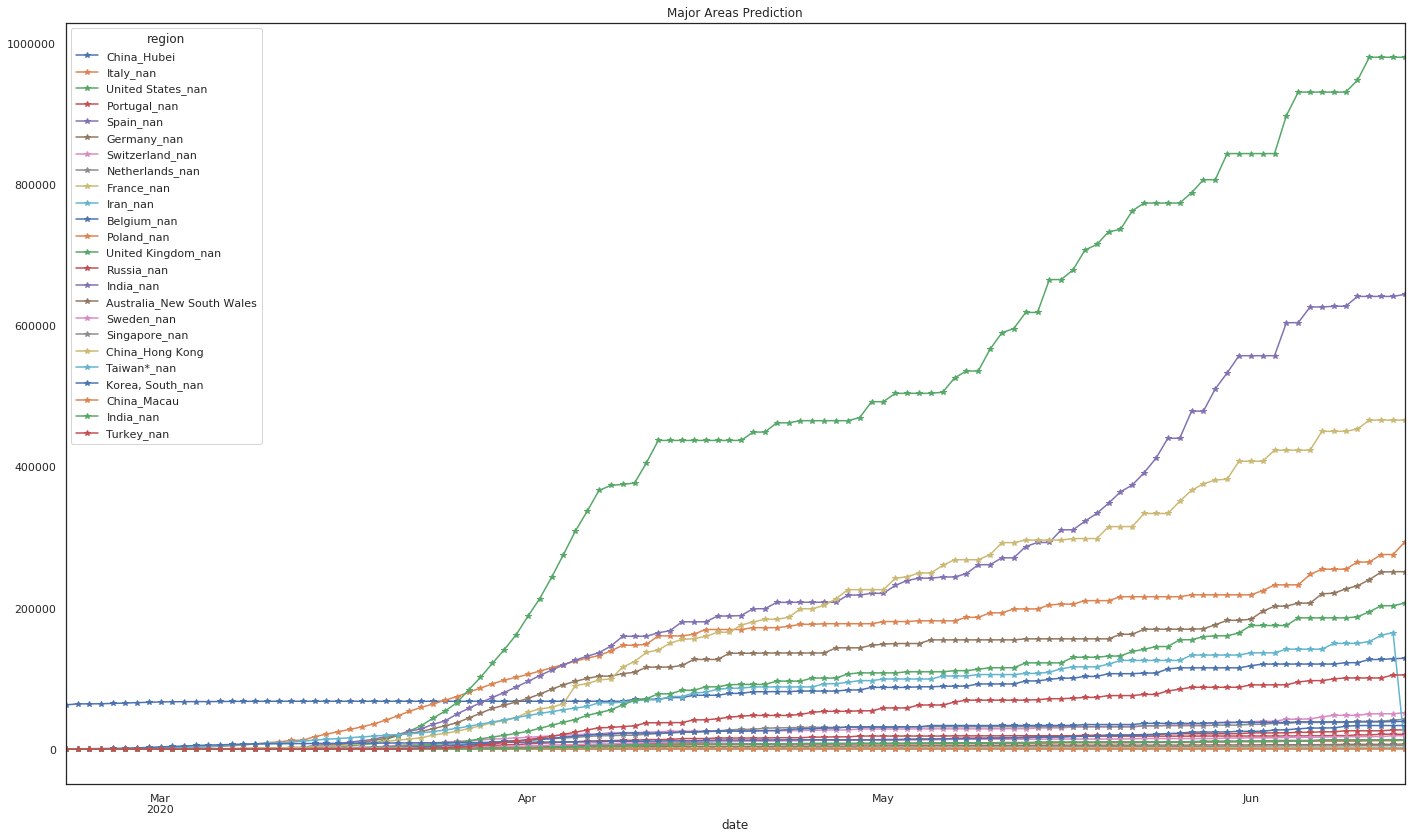

In [188]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
        'Turkey_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

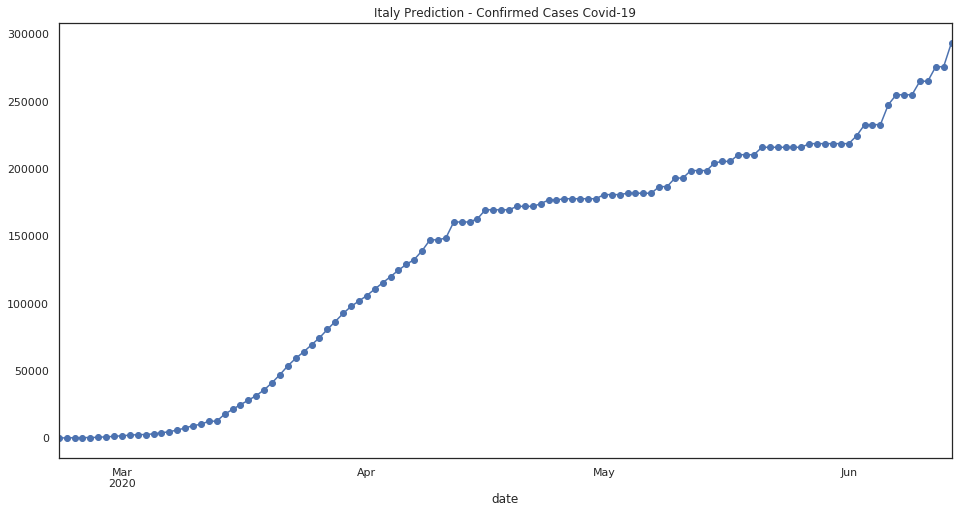

In [189]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2[2:].plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

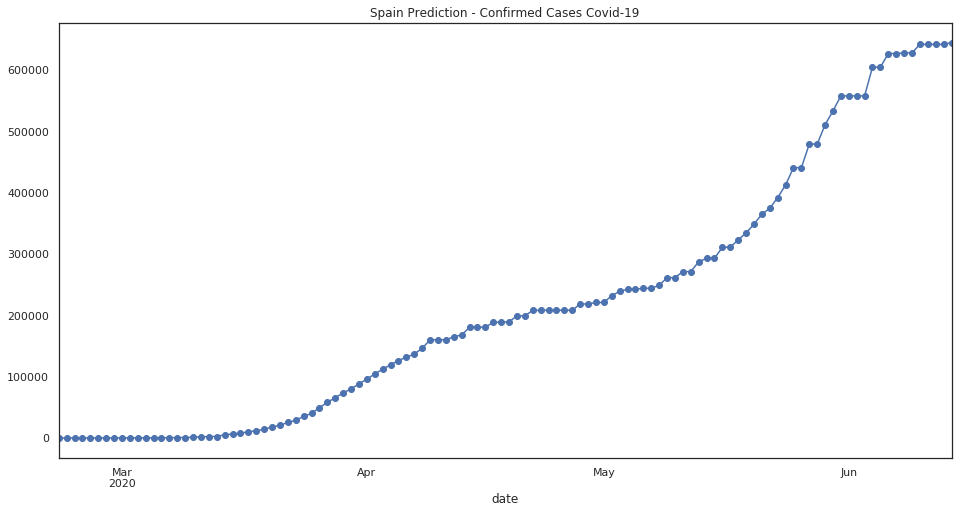

In [190]:
p3=pred['Spain_nan']
p3[2:].plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

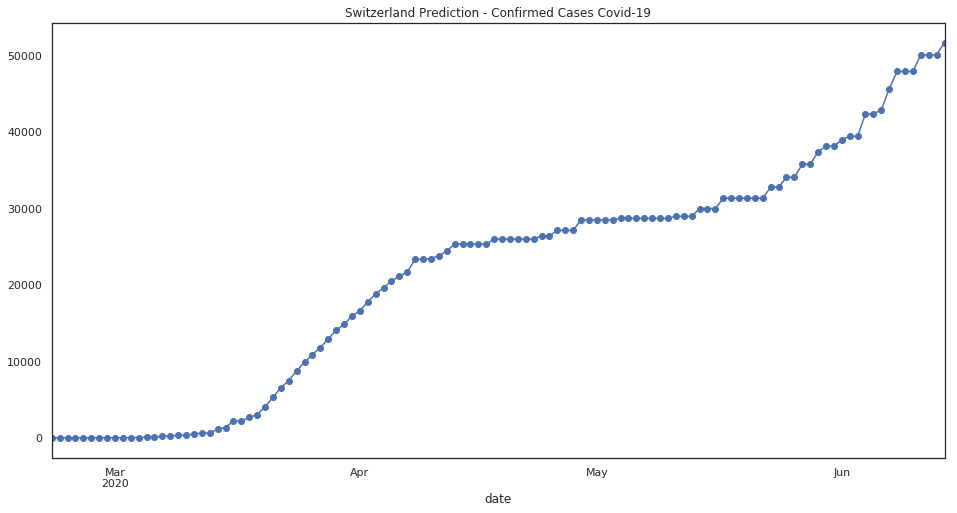

In [191]:
p4=pred['Switzerland_nan']
p4[2:].plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

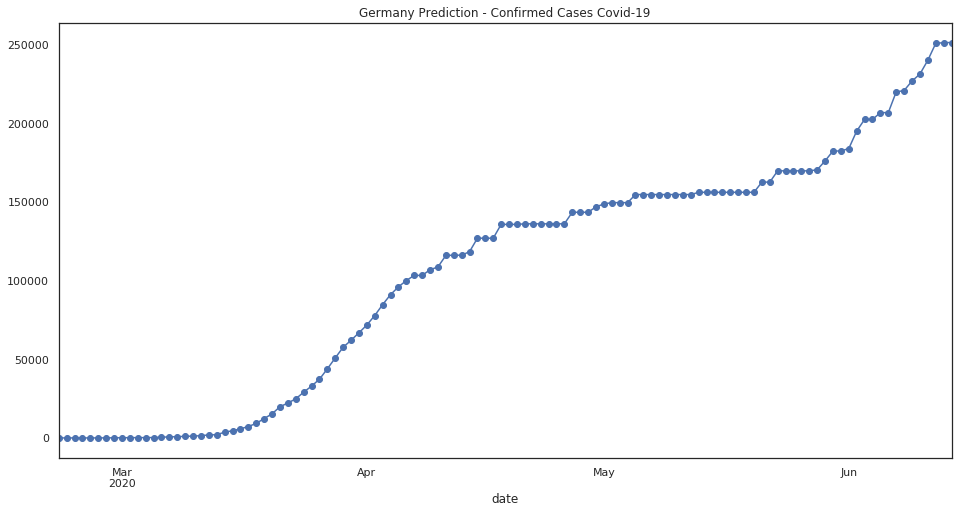

In [192]:
p5=pred['Germany_nan']
p5[2:].plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

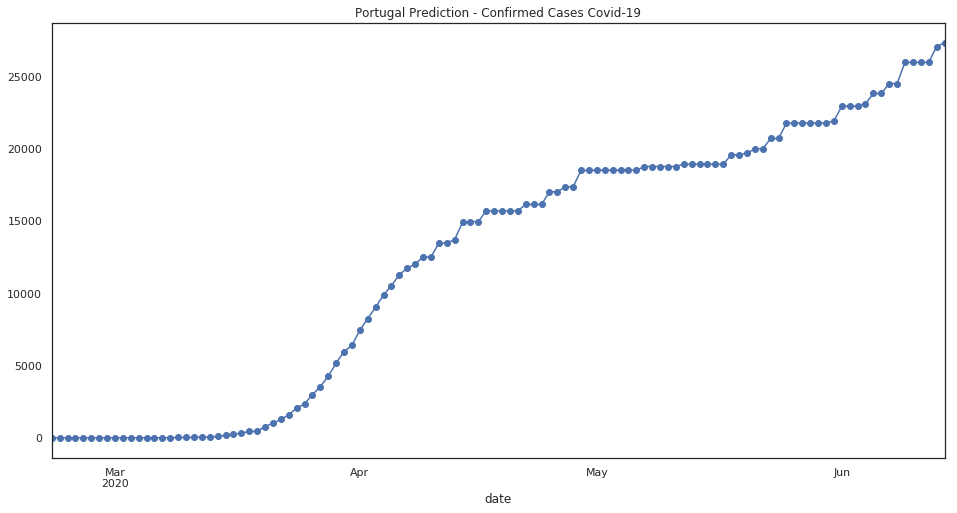

In [193]:
p6=pred['Portugal_nan']
p6[2:].plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

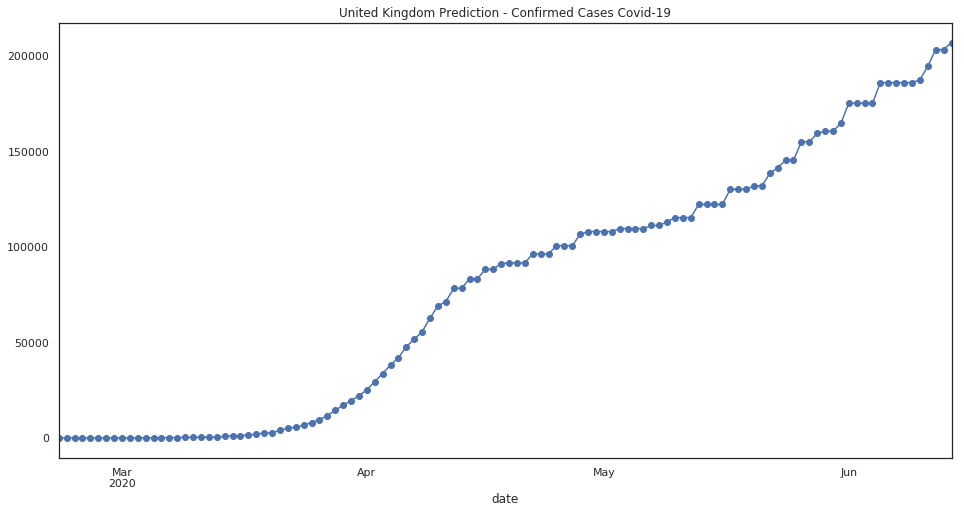

In [194]:
p8=pred['United Kingdom_nan']
p8[2:].plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

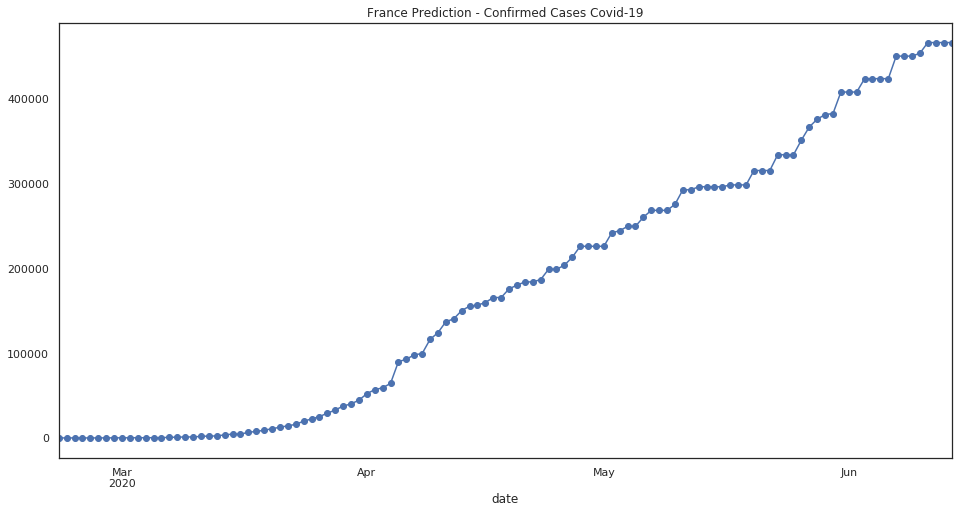

In [195]:
p9=pred['France_nan']
p9[2:].plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

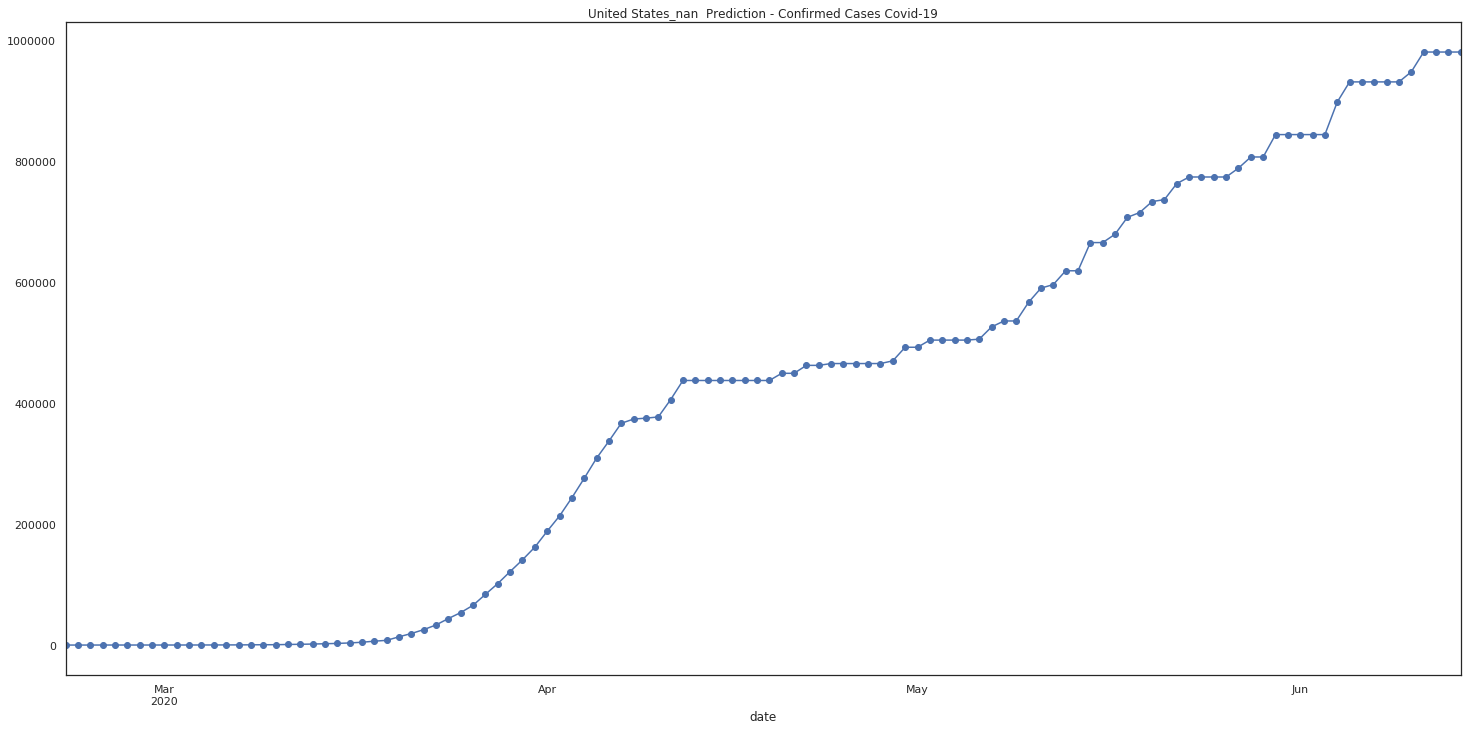

In [196]:
p10=pred['United States_nan']
p10[2:].plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

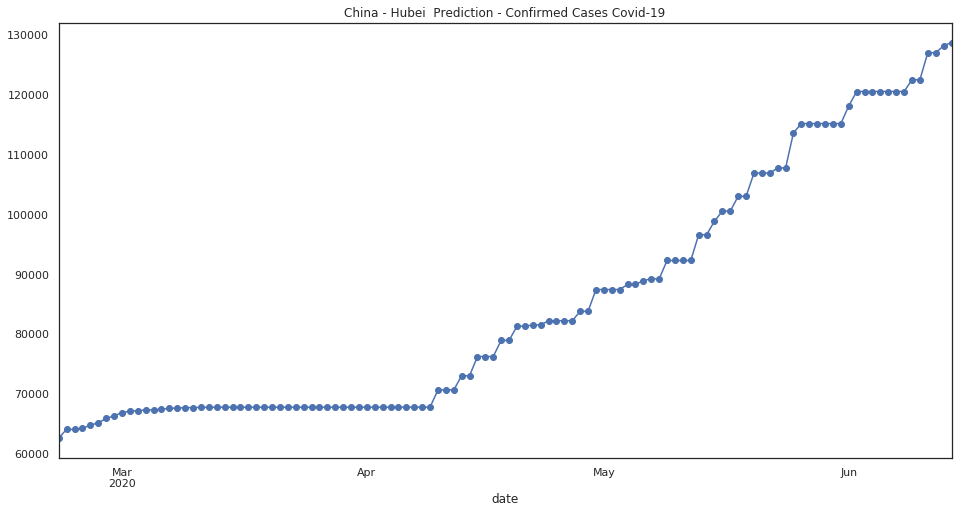

In [197]:
p11=pred['China_Hubei']
p11[2:].plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

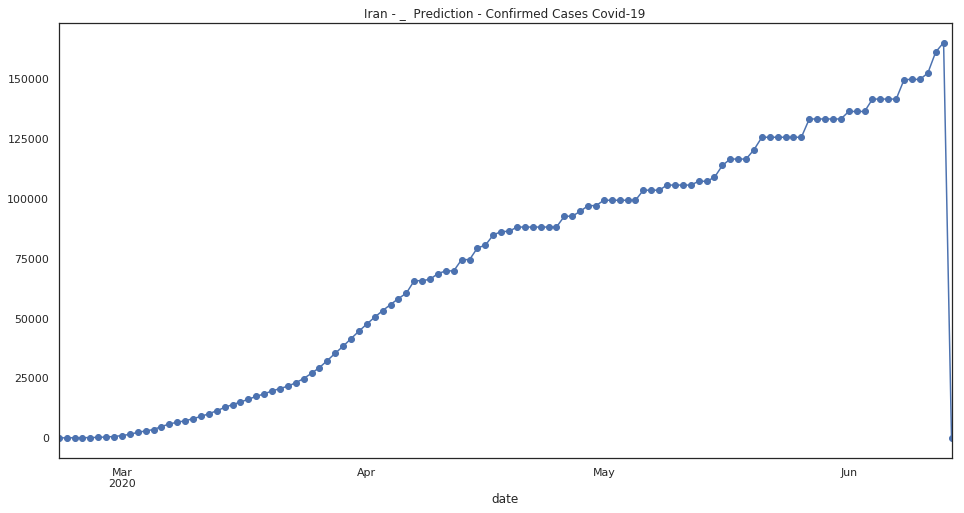

In [198]:
p12=pred['Iran_nan']
p12[2:].plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

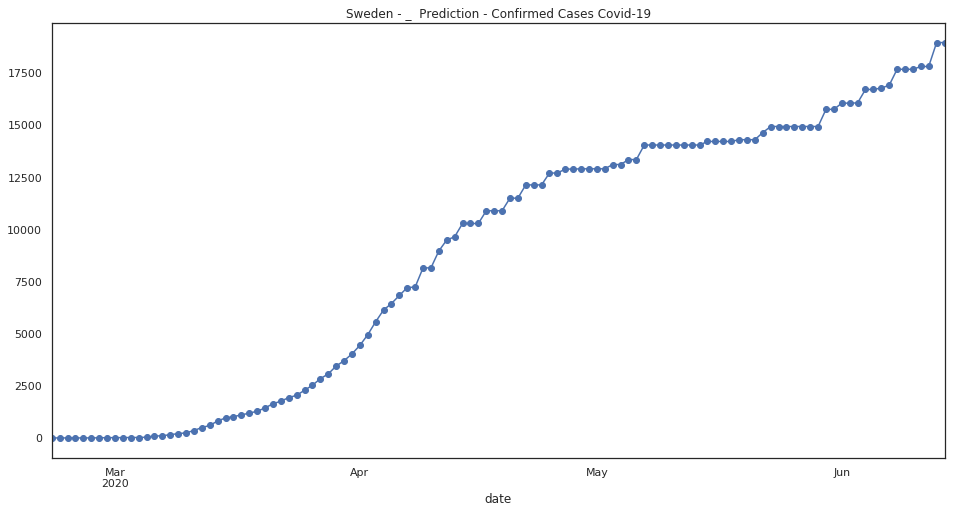

In [199]:
p13=pred['Sweden_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

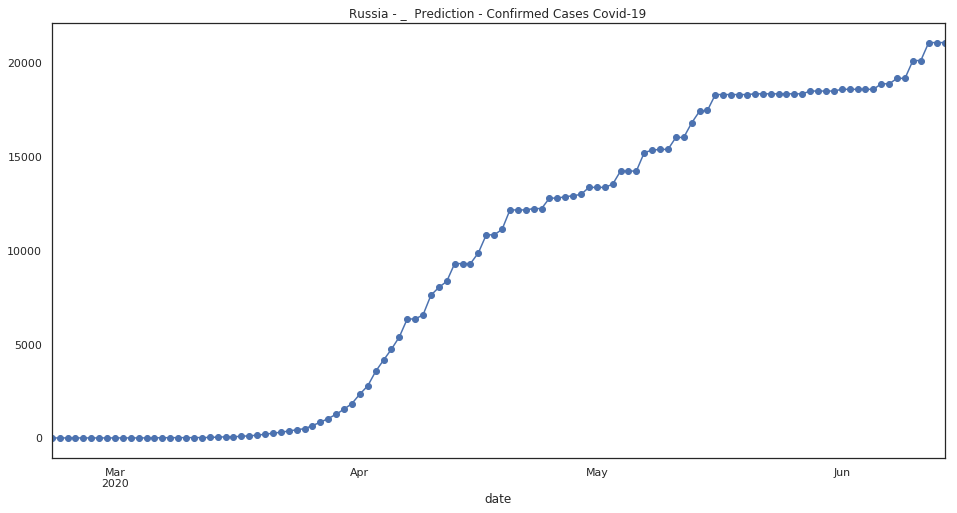

In [200]:
p13=pred['Russia_nan']
p13[2:].plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

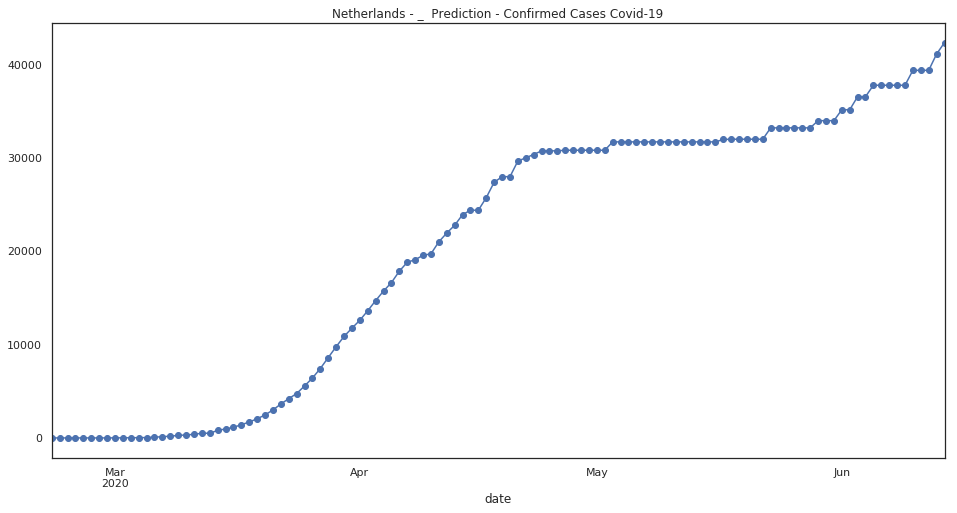

In [201]:
p14=pred['Netherlands_nan']
p14[2:].plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

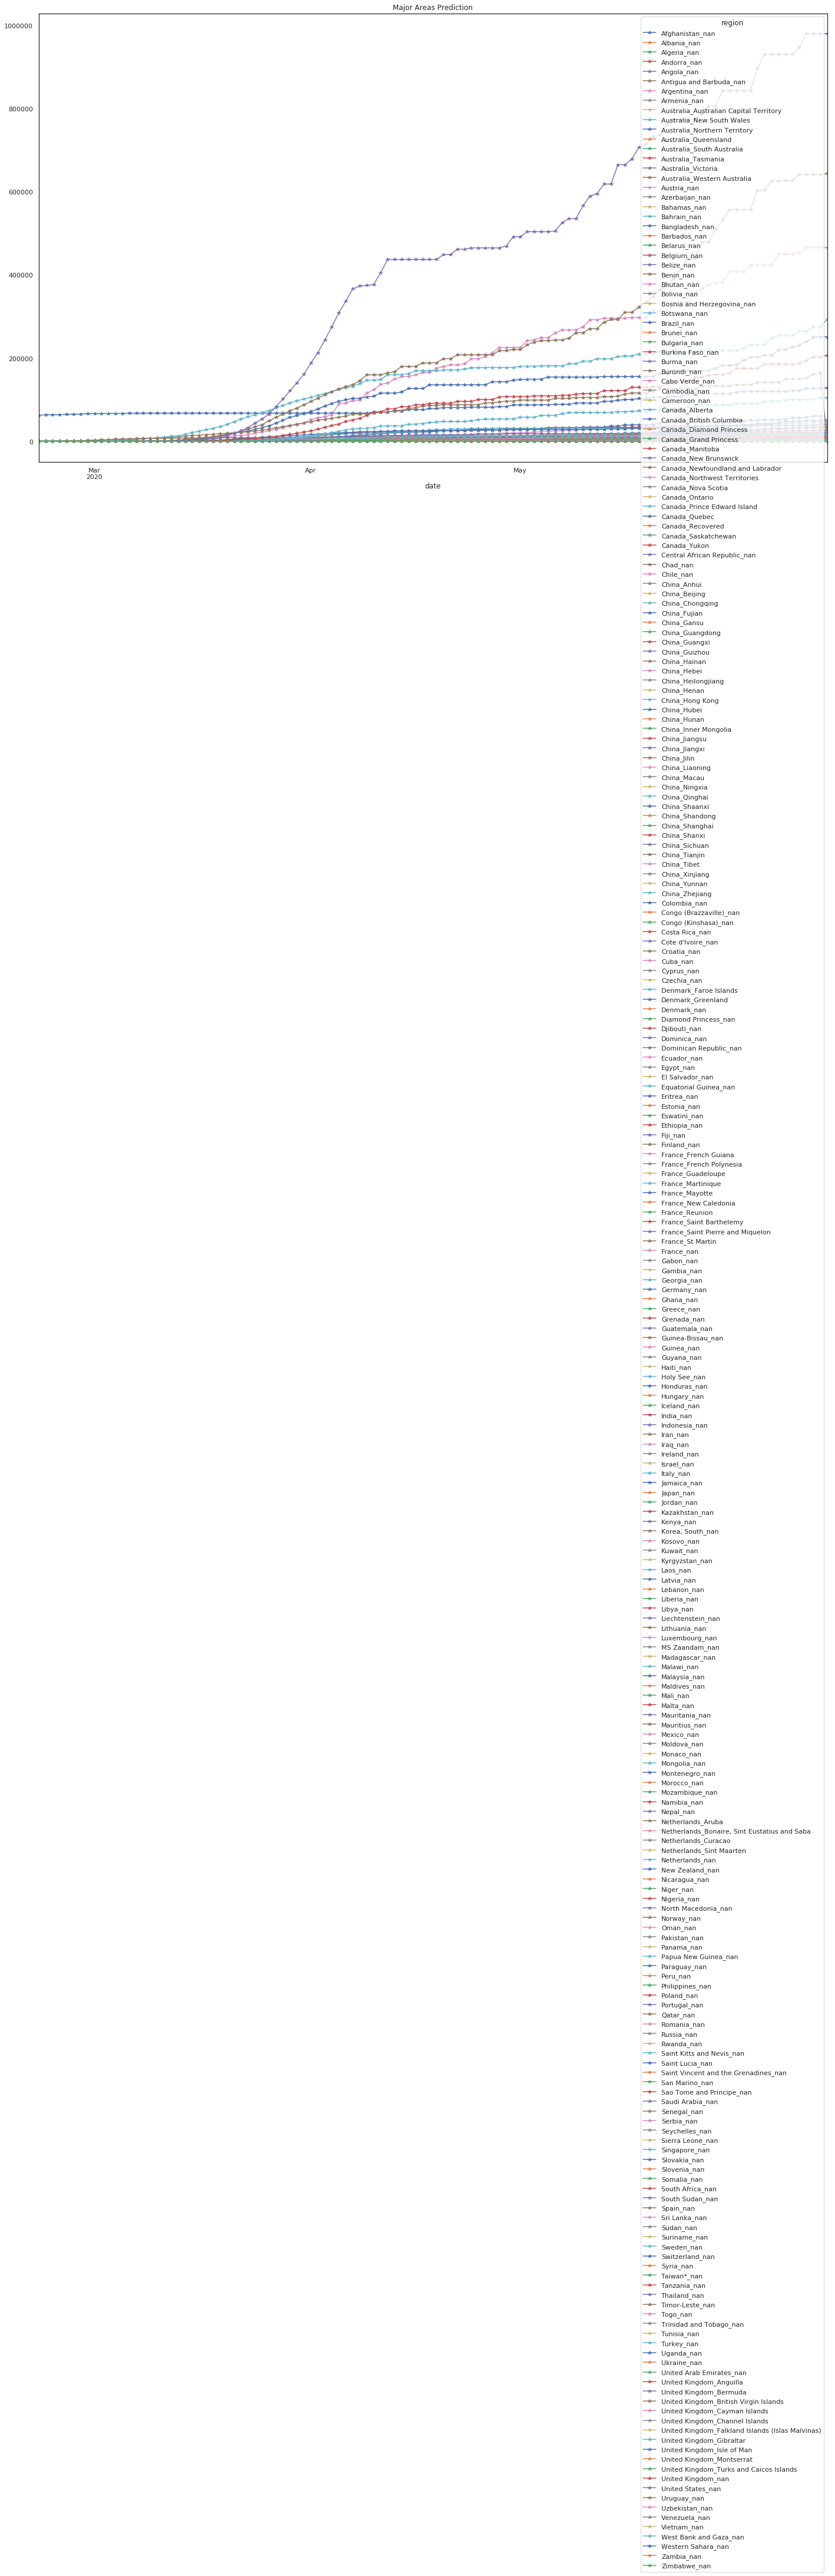

In [202]:
#region=my_train_list
pv2=pred
pv2[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [203]:
pv1=pv2[2:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [204]:
p[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-22              0.0          0.0          0.0          0.0   
2020-02-23              0.0          0.0          0.0          0.0   
2020-02-24              0.0          0.0          0.0          0.0   
2020-02-25              1.0          0.0          1.0          0.0   
2020-02-26              1.0          0.0          1.0          0.0   
2020-02-27              1.0          0.0          1.0          0.0   
2020-02-28              1.0          0.0          1.0          0.0   
2020-02-29              1.0          0.0          1.0          0.0   
2020-03-01              1.0          0.0          1.0          0.0   
2020-03-02              1.0          0.0          1.0          0.0   
2020-03-03              1.0          0.0          3.0          1.0   
2020-03-04              1.0          0.0          5.0          1.0   
2020-03-05              1.0          0.0         12.0          1.0   
2020-03-06              1.0          0.0         12.0          1.0   
2020-03-07              1.0          0.0         17.0          1.0   
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
...                     ...          ...          ...          ...   
2020-05-16            827.0        857.0       2618.0       1012.0   
2020-05-17            827.0        875.0       2618.0       1012.0   
2020-05-18            827.0        875.0       2618.0       1074.0   
2020-05-19            827.0        875.0       2618.0       1121.0   
2020-05-20            827.0        875.0       2730.0       1121.0   
2020-05-21            827.0        875.0       2730.0       1121.0   
2020-05-22            864.0        893.0       2730.0       1201.0   
2020-05-23            867.0        893.0       2750.0       1201.0   
2020-05-24            867.0        937.0       2750.0       1201.0   
2020-05-25            867.0        937.0       2777.0       1287.0   
2020-05-26            867.0        937.0       2861.0       1303.0   
2020-05-27            867.0        954.0       2991.0       1307.0   
2020-05-28            918.0        970.0       2991.0       1307.0   
2020-05-29            926.0       1007.0       2991.0       1307.0   
2020-05-30            926.0       1007.0       3070.0       1307.0   
2020-05-31            926.0       1073.0       3070.0       1389.0   
2020-06-01            934.0       1074.0       3070.0       1389.0   
2020-06-02            991.0       1150.0       3106.0       1389.0   
2020-06-03            991.0       1150.0       3106.0       1456.0   
2020-06-04           1045.0       1220.0       3106.0       1456.0   
2020-06-05           1045.0       1262.0       3106.0       1456.0   
2020-06-06           1110.0       1262.0       3106.0       1473.0   
2020-06-07           1110.0       1262.0       3106.0       1551.0   
2020-06-08           1110.0       1262.0       3106.0       1572.0   
2020-06-09

In [205]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [206]:

#pip install gmplot

In [207]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [208]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [209]:
heatmap_m[:]

region      Lat      Long  2020-02-22 00:00:00  \
0   Australia_New South Wales -33.8688  151.2093                  4.0   
1                 Belgium_nan  50.8333    4.0000                  1.0   
2             China_Hong Kong  22.3000  114.2000                 68.0   
3                 China_Hubei  30.9756  112.2707              62662.0   
4                 China_Macau  22.1667  113.5500                 10.0   
5                  France_nan  46.2276    2.2137                 12.0   
6                 Germany_nan  51.0000    9.0000                 16.0   
7                   India_nan  21.0000   78.0000                  3.0   
8                    Iran_nan  32.0000   53.0000                 28.0   
9                    Iran_nan  32.0000   53.0000                 28.0   
10                  Italy_nan  43.0000   12.0000                 20.0   
11           Korea, South_nan  36.0000  128.0000                204.0   
12            Netherlands_nan  52.1326    5.2913                  0.0   
13                 Poland_nan  51.9194   19.1451                  0.0   
14               Portugal_nan  39.3999   -8.2245                  0.0   
15                 Russia_nan  60.0000   90.0000                  2.0   
16              Singapore_nan   1.2833  103.8333                 85.0   
17                  Spain_nan  40.0000   -4.0000                  2.0   
18                 Sweden_nan  63.0000   16.0000                  1.0   
19            Switzerland_nan  46.8182    8.2275                  0.0   
20                Taiwan*_nan  23.7000  121.0000                 26.0   
21                 Turkey_nan  38.9637   35.2433                  0.0   
22         United Kingdom_nan  55.3781   -3.4360                  9.0   
23          United States_nan  37.0902  -95.7129                 15.0   

    2020-02-23 00:00:00  2020-02-24 00:00:00  2020-02-25 00:00:00  \
0                   4.0                  4.0                  4.0   
1                   1.0                  1.0                  1.0   
2                  69.0                 74.0                 84.0   
3               64084.0              64084.0              64287.0   
4                  10.0                 10.0                 10.0   
5                  12.0                 12.0                 12.0   
6                  16.0                 16.0                 17.0   
7                   3.0                  3.0                  3.0   
8                  43.0                 61.0                 95.0   
9                  43.0                 61.0                 95.0   
10                 62.0                155.0                229.0   
11                433.0                602.0                833.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  2.0                  2.0                  2.0   
16                 85.0                 89.0                 89.0   
17                  2.0                  2.0                  6.0   
18                  1.0                  1.0                  1.0   
19                  0.0                  0.0                  1.0   
20                 26.0                 28.0                 30.0   
21                  0.0                  0.0                  0.0   
22                  9.0                  9.0                 13.0   
23                 15.0                 15.0                 51.0   

    2020-02-26 00:00:00  2020-02-27 00:00:00  2020-02-28 00:00:00  ...  \
0                   4.0                  4.0                  4.0  ...   
1                   1.0                  1.0                  1.0  ...   
2                  84.0                 91.0                 92.0  ...   
3               64786.0              65187.0              65914.0  ...   
4                  10.0                 10.0                 10.0  ...   
5                  14.0    

In [211]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-1
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [212]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("heatmaps/Heatmap-"+datemap+".html")

In [213]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [214]:
exit()

H2O session _sid_99d0 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
